In [1]:
# Imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Load Data
run1 = pd.read_csv('../Data/ClusterData/final_run_1.csv')
run2 = pd.read_csv('../Data/ClusterData/final_run_2.csv')
runs = [run1, run2]

In [2]:
run1

clusters member_casual rideable_type start_station_district  \
0              9        member   docked_bike              Cambridge   
1              9        member   docked_bike              Cambridge   
2              9        member   docked_bike              Cambridge   
3              9        member   docked_bike              Cambridge   
4              9        member   docked_bike              Cambridge   
...          ...           ...           ...                    ...   
631489        -1        member  classic_bike                 Boston   
631490         5        member  classic_bike                 Boston   
631491         5        member  classic_bike                 Boston   
631492         5        member  classic_bike                 Boston   
631493        -1        member  classic_bike                 Boston   

       end_station_district  start_lat  start_lng    end_lat    end_lng  \
0                 Cambridge  42.365994 -71.095222  42.386748 -71.119019   
1                 Cambridge  42.370803 -71.104412  42.386748 -71.119019   
2                 Cambridge  42.365994 -71.095222  42.361358 -71.096703   
3                    Boston  42.370803 -71.104412  42.363871 -71.050877   
4                 Cambridge  42.370803 -71.104412  42.361358 -71.096703   
...                     ...        ...        ...        ...        ...   
631489               Boston  42.365673 -71.064263  42.349544 -71.072421   
631490               Boston  42.351692 -71.119035  42.347241 -71.105301   
631491               Boston  42.351692 -71.119035  42.347241 -71.105301   
631492            Cambridge  42.351692 -71.119035  42.374267 -71.100265   
631493            Cambridge  42.365673 -71.064263  42.369885 -71.069957   

        duration_minutes  ...  start_month  start_day  start_hour  \
0              14.583333  ...            4          3          17   
1              16.500000  ...            4          3          17   
2               6.783333  ...            4          3          20   
3              22.033333  ...            4          5          18   
4               7.450000  ...            4          5          12   
...                  ...  ...          ...        ...         ...   
631489          9.433333  ...           12          4           7   
631490          6.433333  ...           12          6          21   
631491          9.366667  ...           12          6          11   
631492         20.300000  ...           12          5          18   
631493          9.000000  ...           12          4          13   

        start_station_danger_score_.5m  start_station_danger_score_1m  \
0                                  0.0                            5.0   
1                                  0.0                           31.0   
2                                  0.0                            5.0   
3                                  0.0                           31.0   
4                                  0.0                           31.0   
...                                ...                            ...   
631489                           119.0                          349.0   
631490                           103.0                          293.0   
631491                           103.0                          293.0   
631492                           103.0                          293.0   
631493                           119.0                          349.0   

        start_station_total_docks  end_station_danger_score_.5m  \
0                            19.0                           0.0   
1                            23.0                           0.0   
2                            19.0                           0.0   
3                            23.0                         100.0   
4                            23.0                           0.0   
...                           ...                           ...   
631489                       36.0                         167.0   
631490      

In [3]:
run1.columns

Index(['clusters', 'member_casual', 'rideable_type', 'start_station_district',
       'end_station_district', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'duration_minutes', 'trip_distance', 'trip_frequency', 'AvgTemp',
       'start_month', 'start_day', 'start_hour',
       'start_station_danger_score_.5m', 'start_station_danger_score_1m',
       'start_station_total_docks', 'end_station_danger_score_.5m',
       'end_station_danger_score_1m', 'end_station_total_docks',
       'season_ordinal'],
      dtype='object')

In [4]:
run2.columns

Index(['start_lat', 'start_lng', 'clusters', 'member_casual', 'rideable_type',
       'start_station_district', 'end_station_district', 'end_lat', 'end_lng',
       'duration_minutes', 'trip_distance', 'trip_frequency', 'AvgTemp',
       'start_month', 'start_day', 'start_hour',
       'start_station_danger_score_.5m', 'start_station_danger_score_1m',
       'start_station_total_docks', 'end_station_danger_score_.5m',
       'end_station_danger_score_1m', 'end_station_total_docks',
       'season_ordinal'],
      dtype='object')

In [5]:
for i in range(len(runs)):
    # Removing noise
    runs[i] = runs[i][runs[i]['clusters'] != -1]

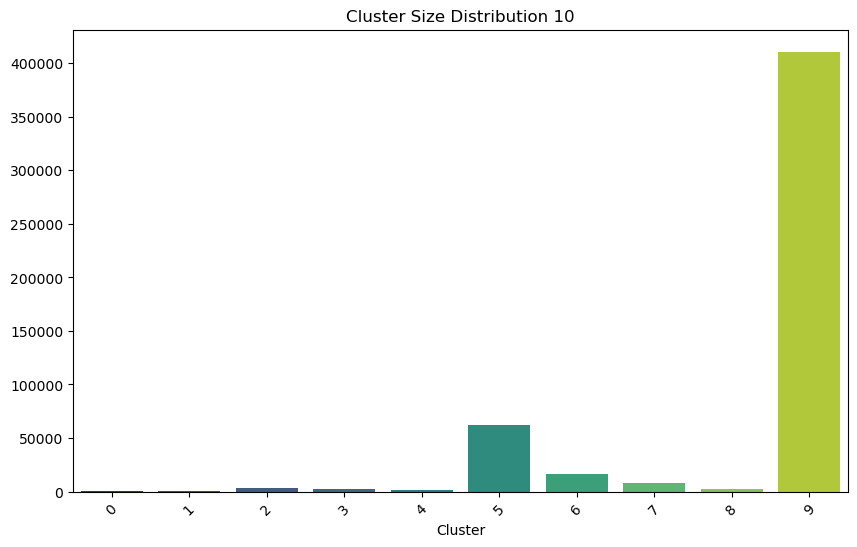

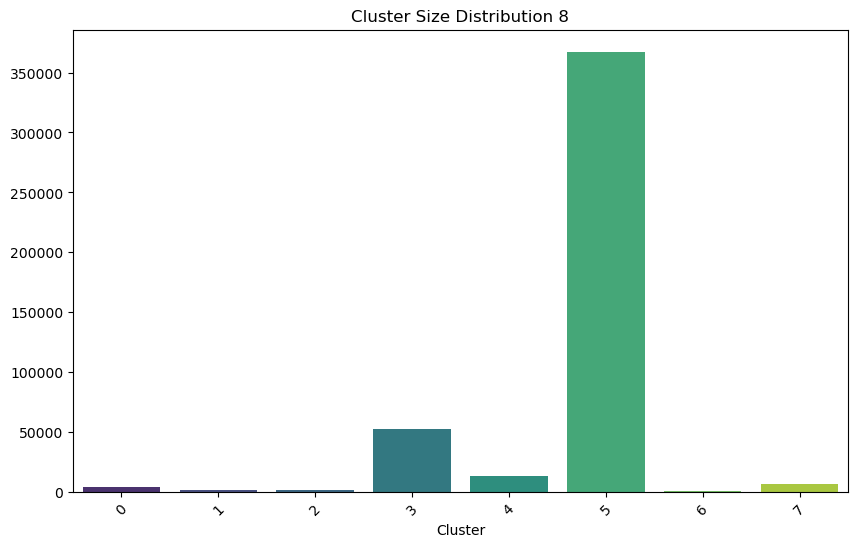

In [6]:
for run in runs: 
    cluster_sizes = run['clusters'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette="viridis")
    plt.title(f'Cluster Size Distribution {len(run["clusters"].unique())}')
    plt.xlabel('Cluster')
    # Rotate labels 
    plt.xticks(rotation=45)  
    plt.show()

In [7]:
for run in runs: 
    # Calculating summary statistics for each cluster
    metrics = ['duration_minutes', 'trip_distance', 'trip_frequency', 'AvgTemp', 
               'start_station_danger_score_.5m', 'start_station_danger_score_1m', 
               'end_station_danger_score_.5m', 'end_station_danger_score_1m']
    cluster_summary = run.groupby('clusters')[metrics].agg(['mean', 'median', 'std']).reset_index()

    # Displaying the summary statistics
    print(cluster_summary)


  clusters duration_minutes                       trip_distance            \
                       mean     median        std          mean    median   
0        0         8.754301   8.066667   3.432518      0.884071  0.943743   
1        1         5.561681   4.833333   3.906623      0.574839  0.574839   
2        2         8.824049   7.866667   4.444263      0.839692  0.933045   
3        3         9.904717   8.016667  10.178057      0.807386  0.697714   
4        4         8.599708   7.366667   9.793560      0.824778  0.811959   
5        5        11.477929   8.950000  12.453091      0.952411  0.844808   
6        6        12.107839   9.100000  11.775732      0.878420  0.789343   
7        7         8.992688   7.300000   7.459386      0.846705  0.886854   
8        8         9.485973   7.975000   6.856548      0.822952  0.777750   
9        9        14.376667  10.550000  15.080067      1.048356  0.914393   

            trip_frequency                        ...  \
        std       

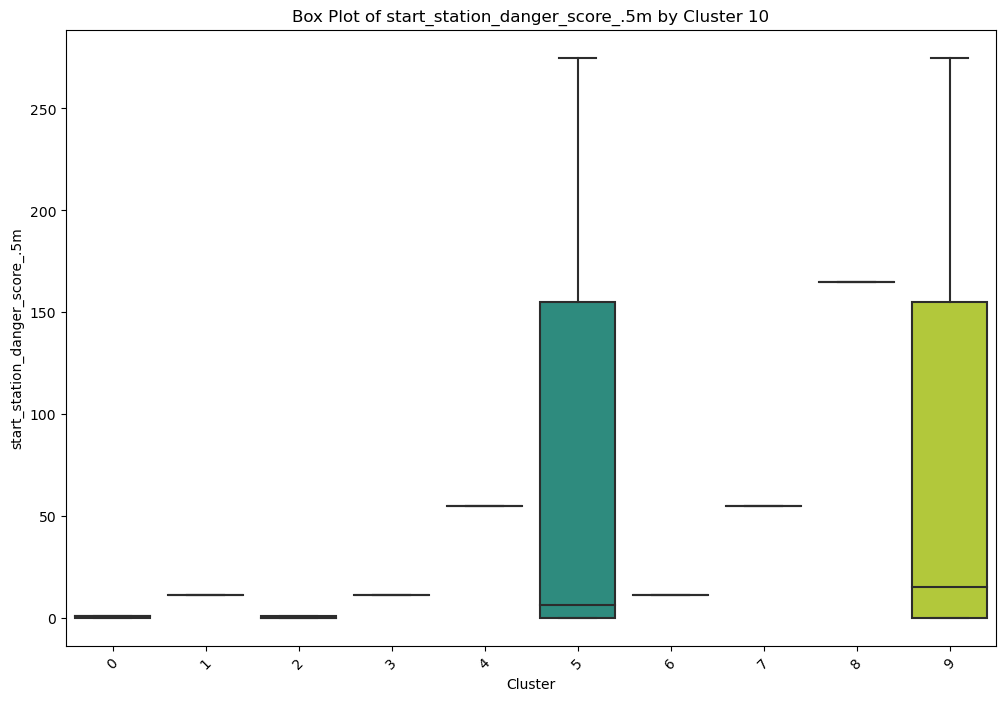

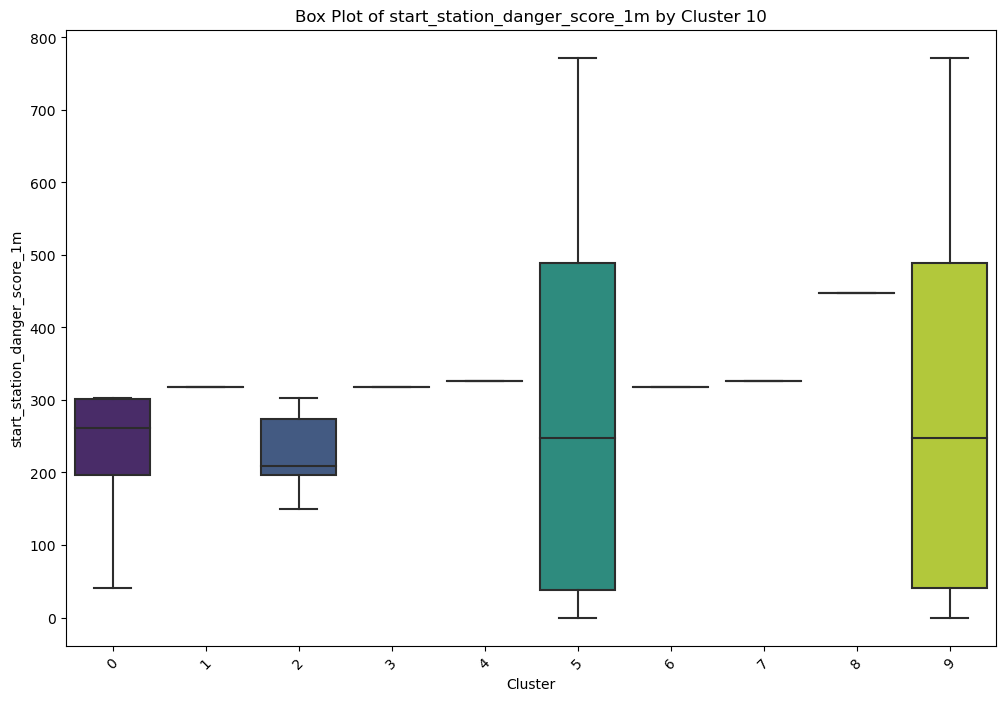

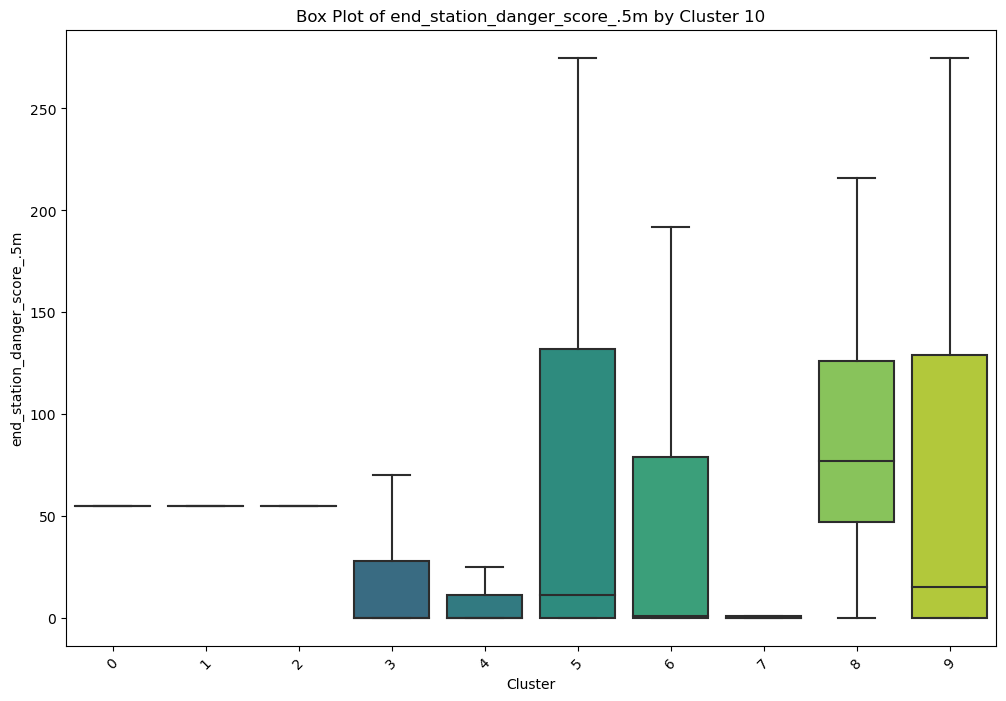

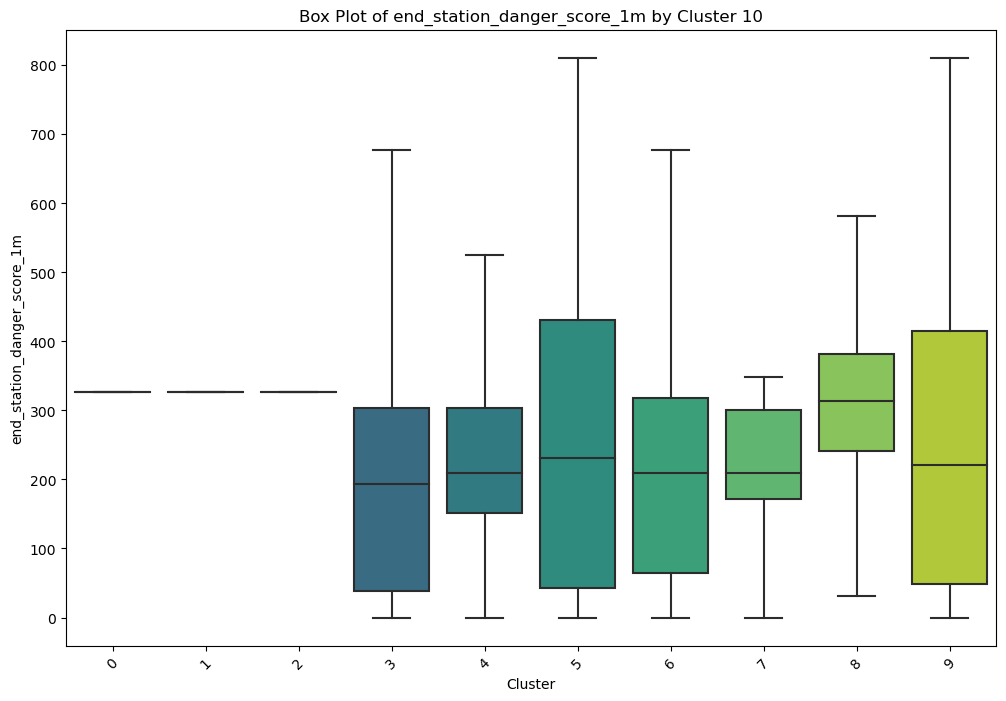

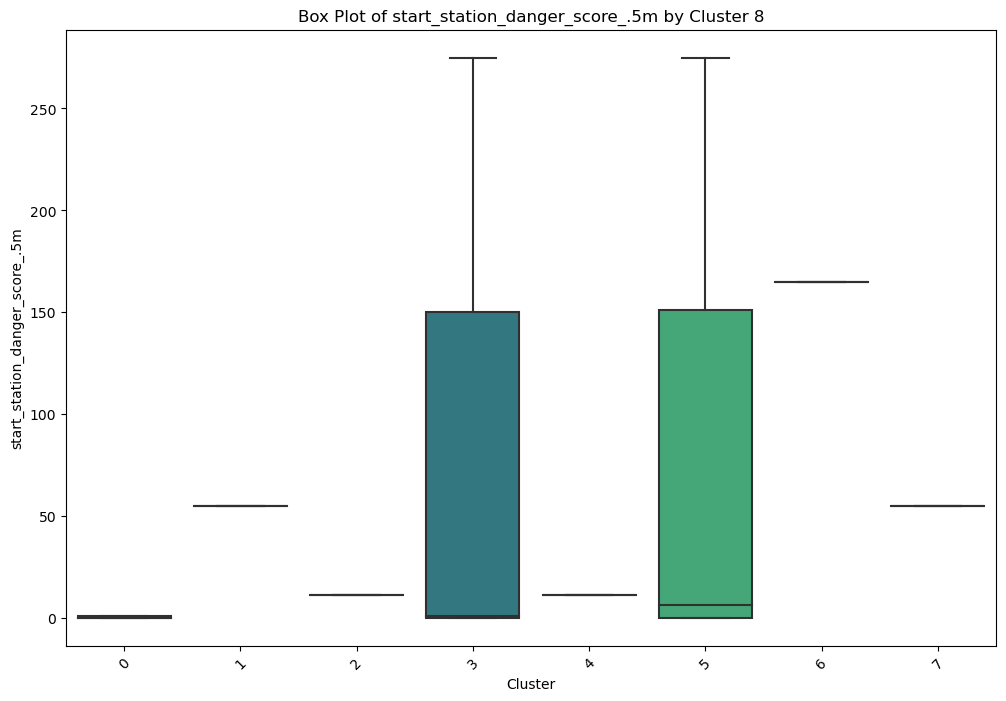

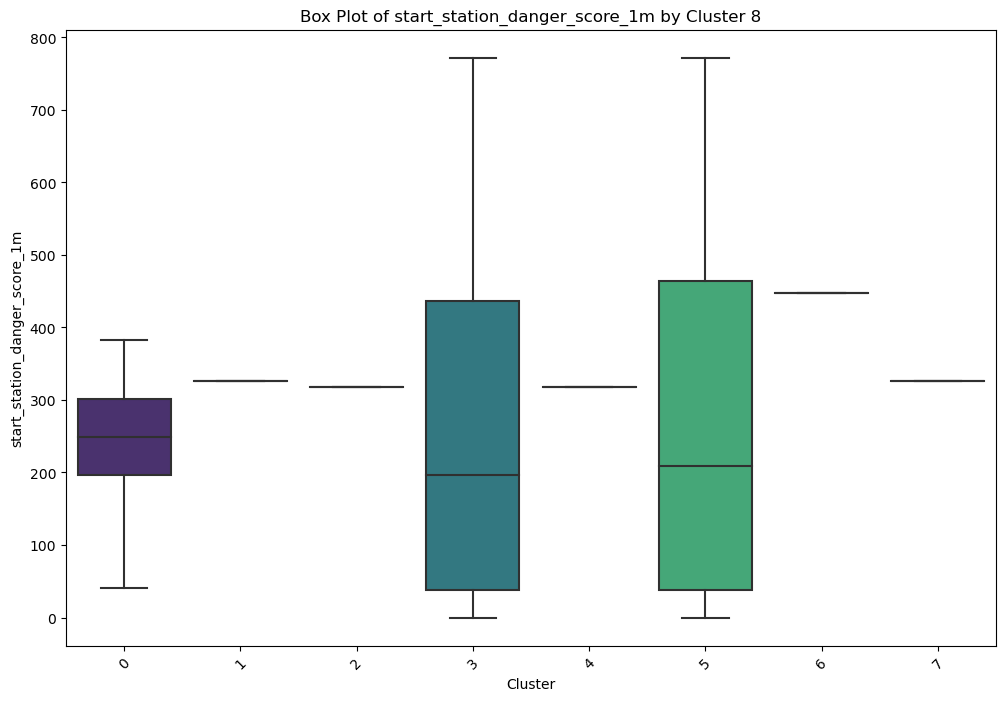

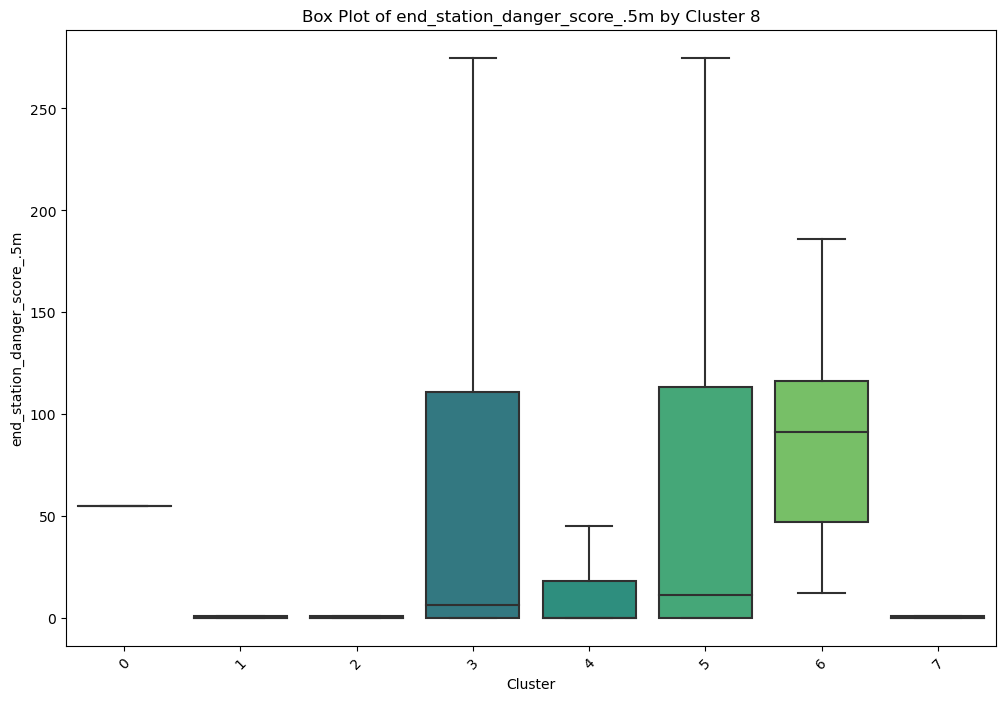

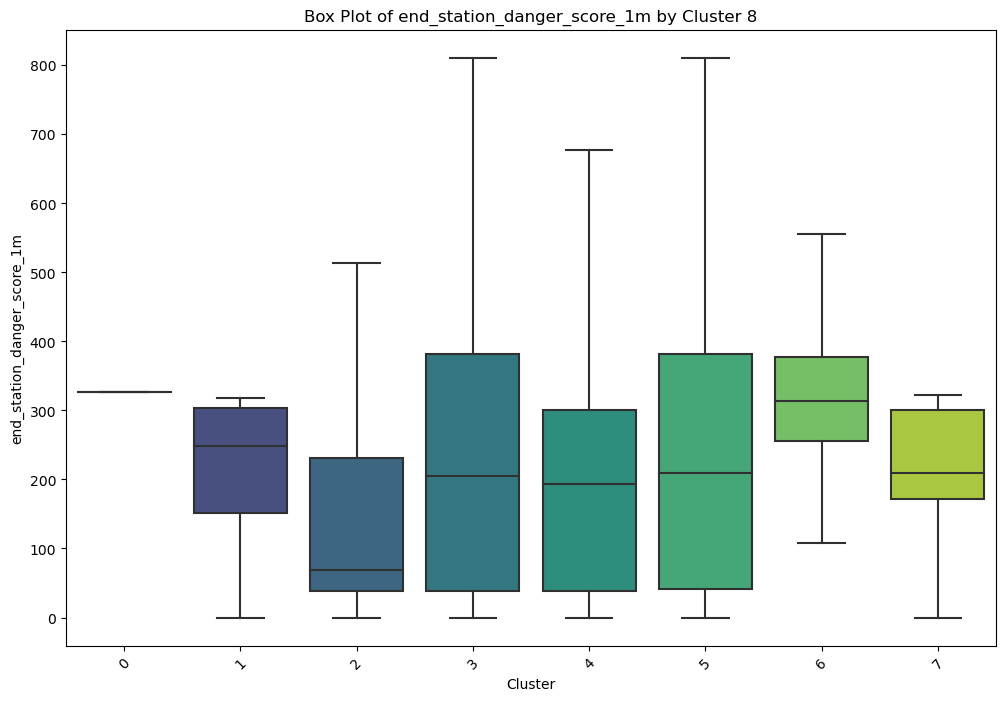

In [8]:
# Box Plot Analysis of Safety Metrics
safety_metrics = ['start_station_danger_score_.5m', 'start_station_danger_score_1m', 
                  'end_station_danger_score_.5m', 'end_station_danger_score_1m']
for run in runs: 
    
    for metric in safety_metrics:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='clusters', y=metric, data=run, palette="viridis", showfliers=False)
        plt.title(f'Box Plot of {metric} by Cluster {len(run["clusters"].unique())}')
        plt.xlabel('Cluster')
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.show()

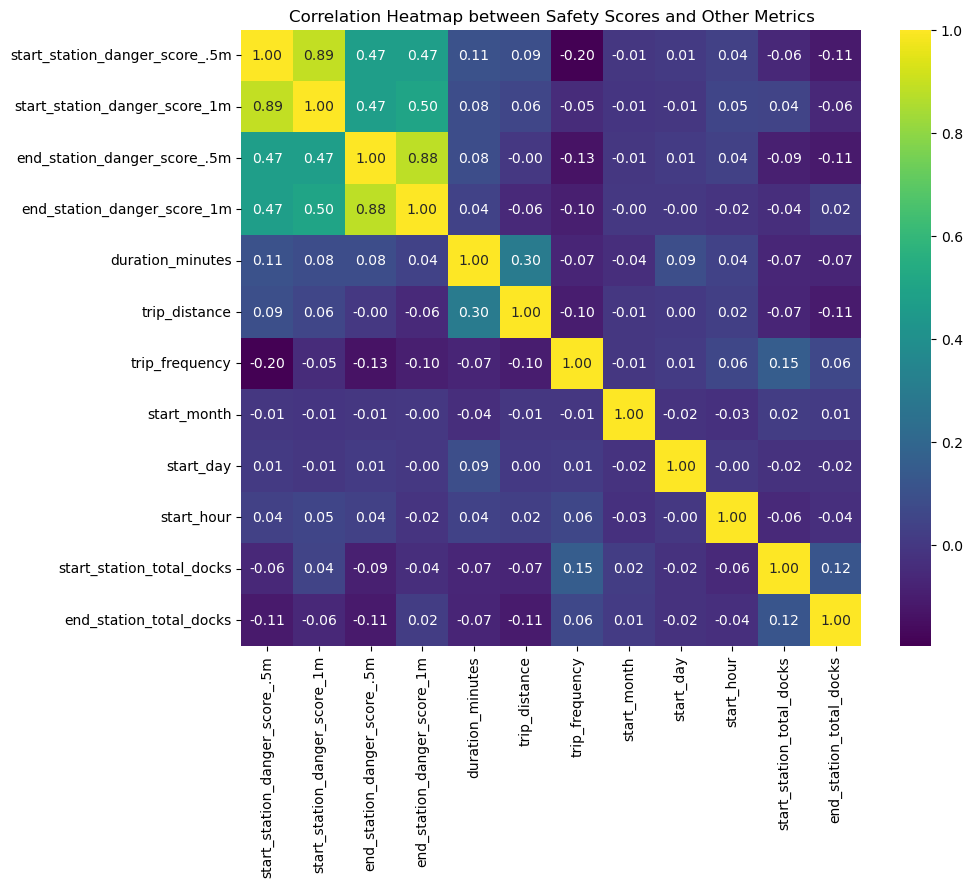

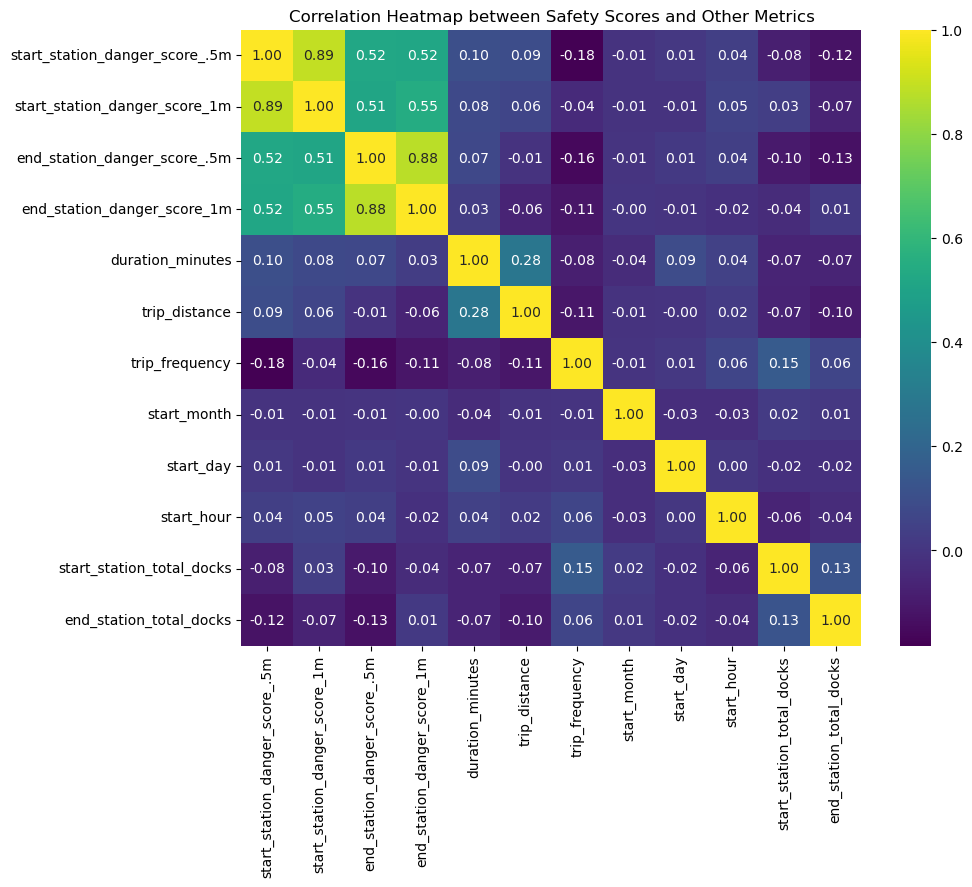

In [9]:
# Correlational Analysis of Safety Metrics
for run in runs: 

    # Selecting relevant columns for correlation analysis
    correlation_metrics = safety_metrics + ['duration_minutes', 'trip_distance', 'trip_frequency', 
                                            'start_month', 'start_day', 'start_hour',
                                           'start_station_total_docks', 'end_station_total_docks']
    correlation_df = run[correlation_metrics].corr()

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_df, annot=True, cmap="viridis", fmt=".2f")
    plt.title('Correlation Heatmap between Safety Scores and Other Metrics')
    plt.show()

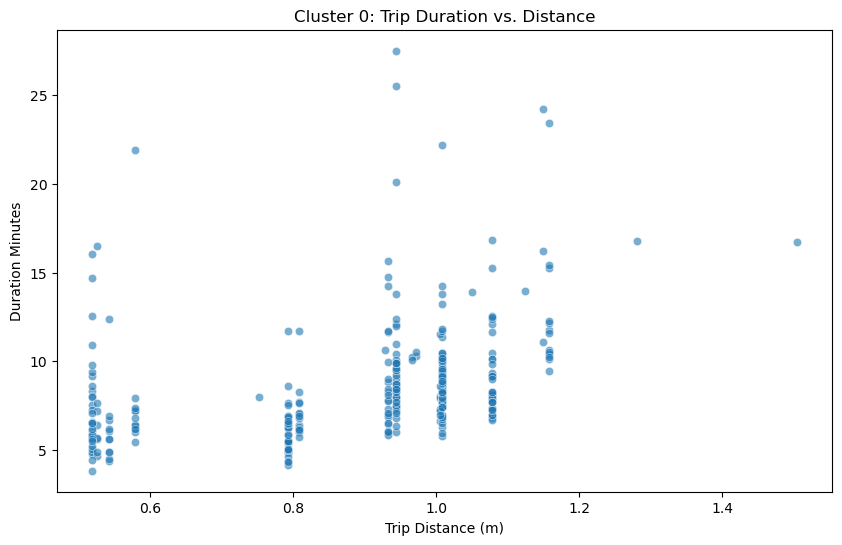

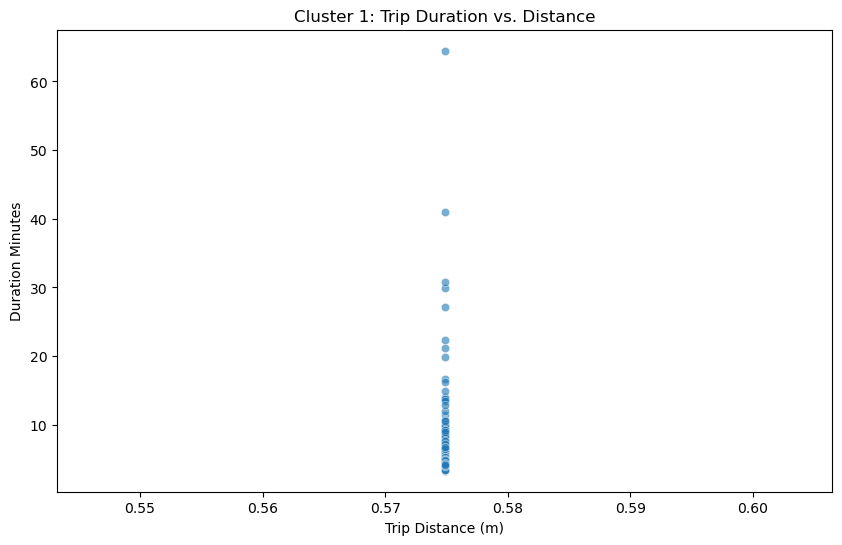

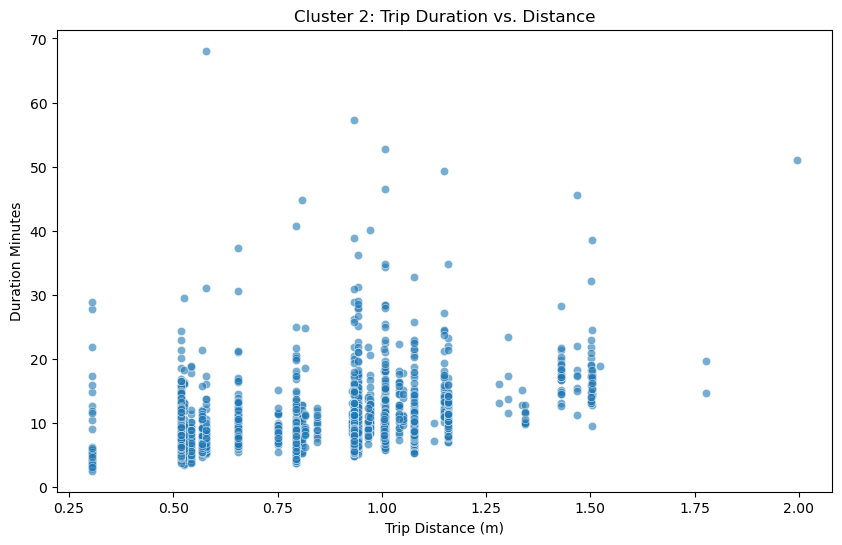

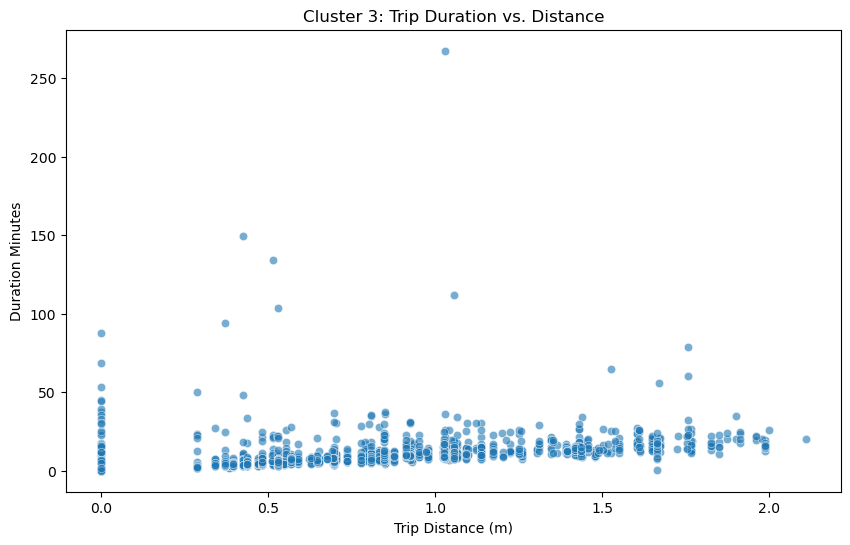

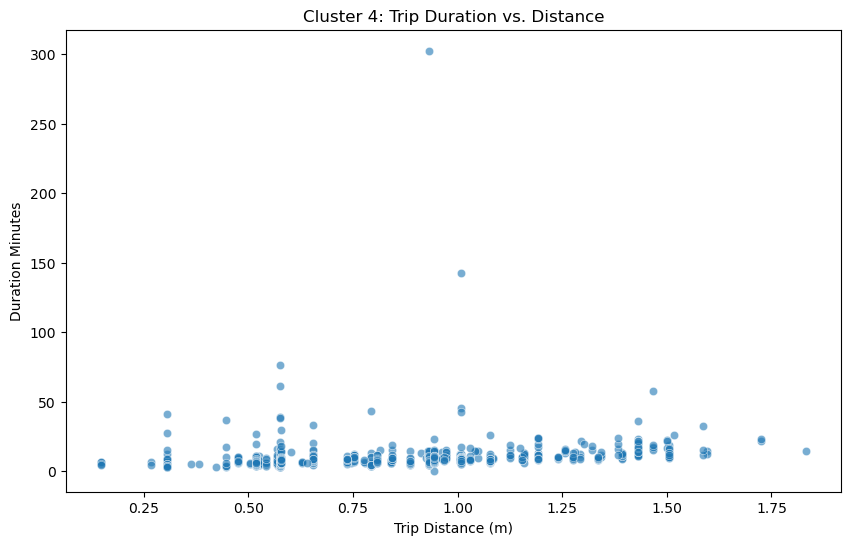

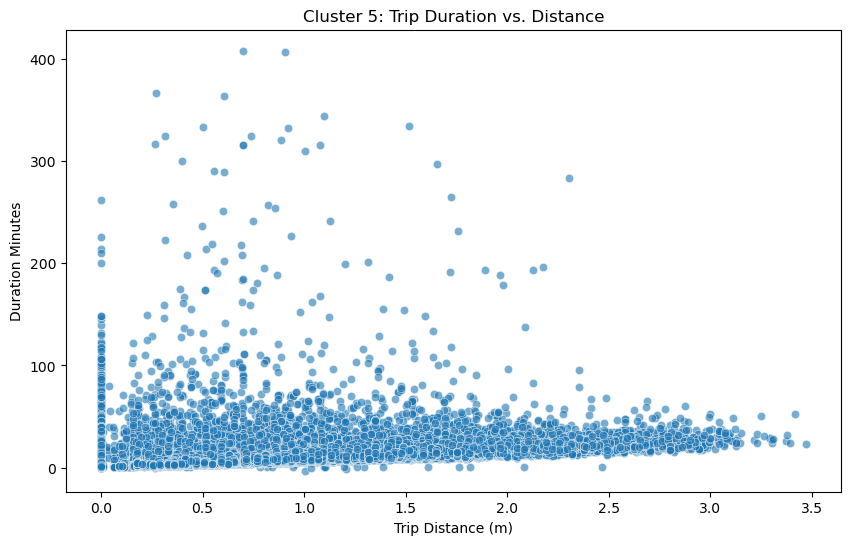

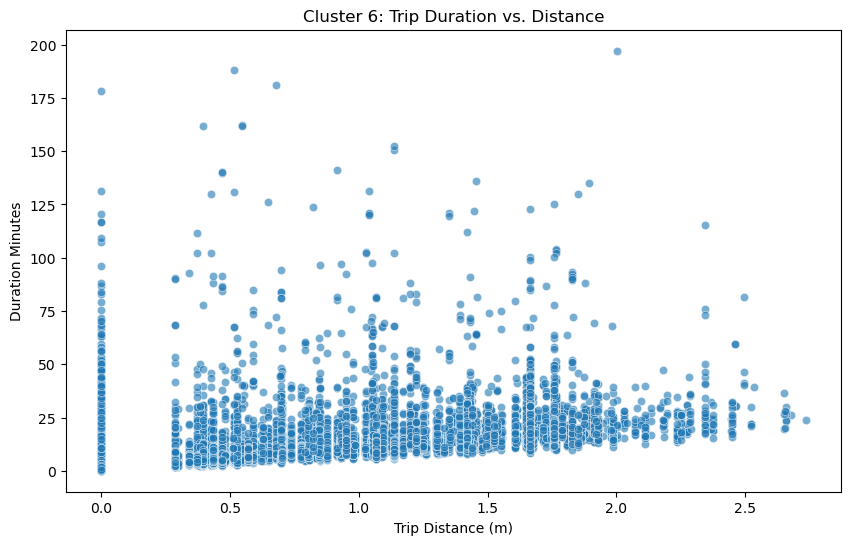

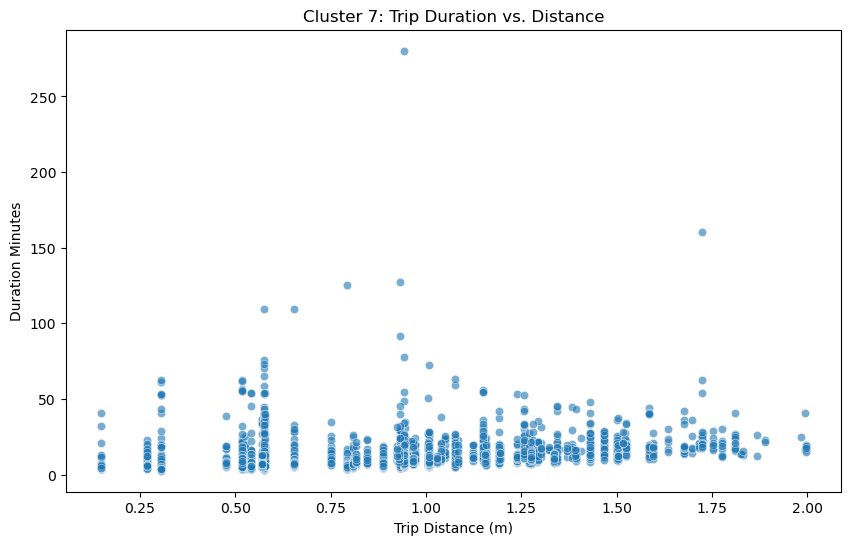

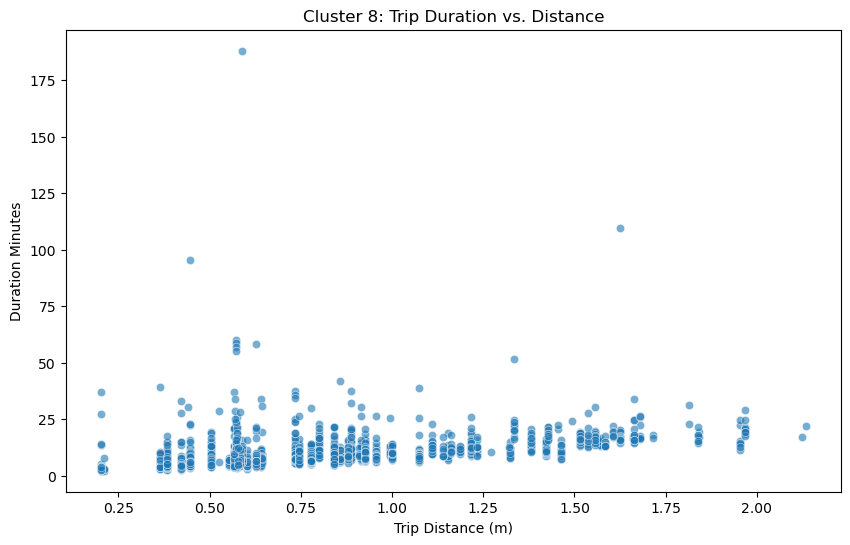

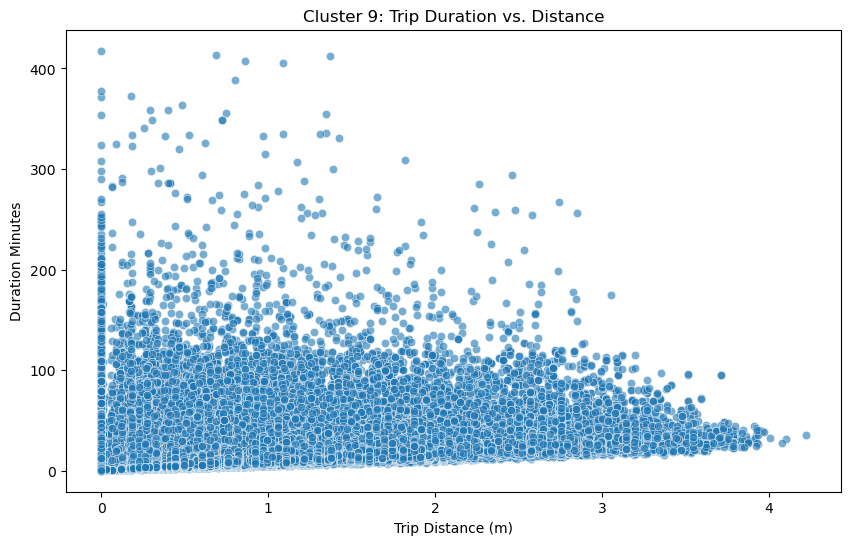

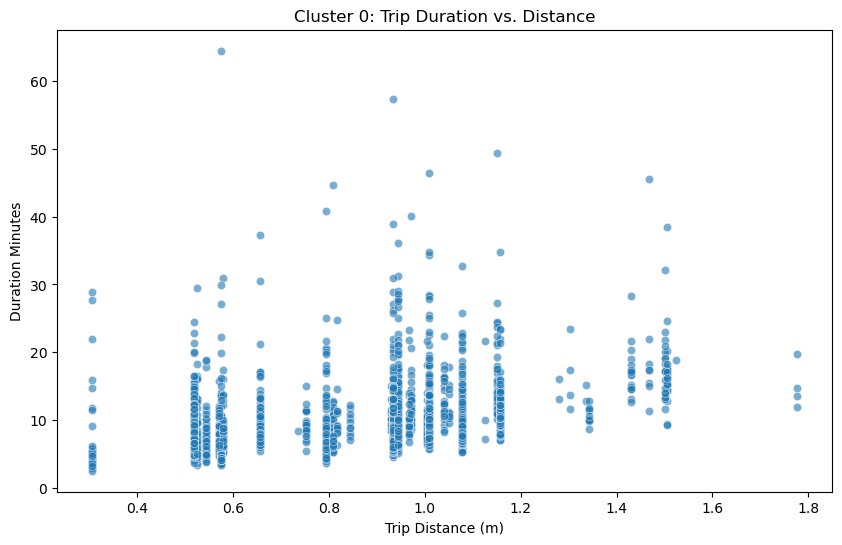

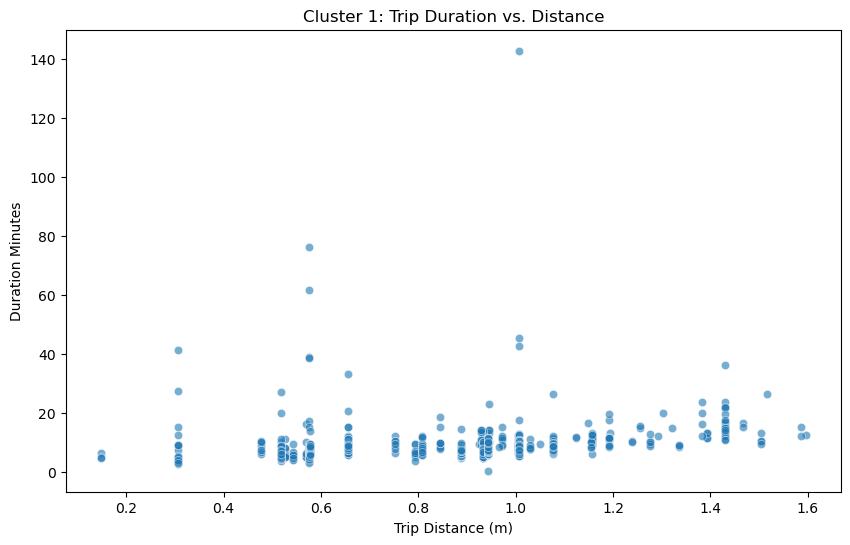

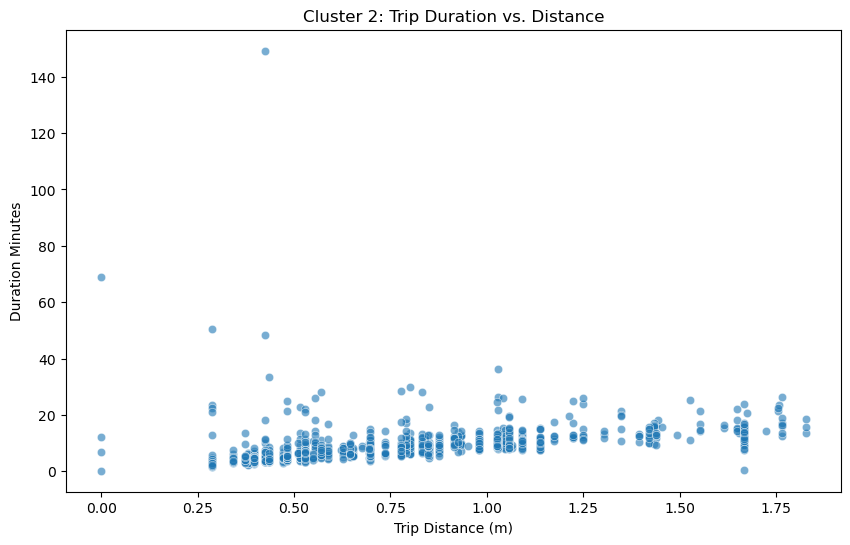

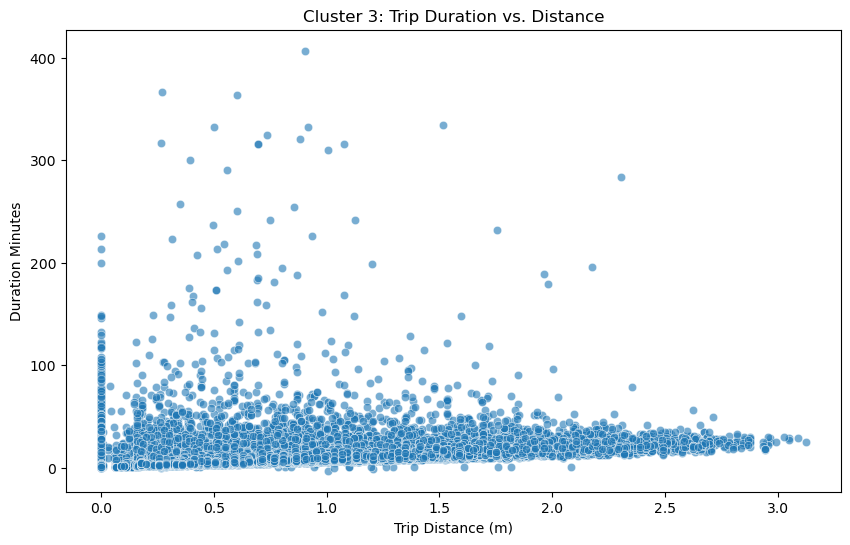

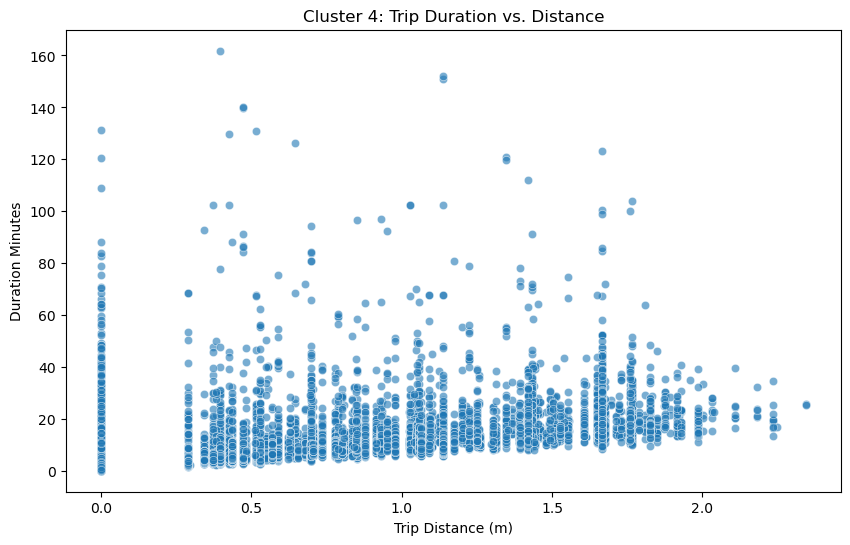

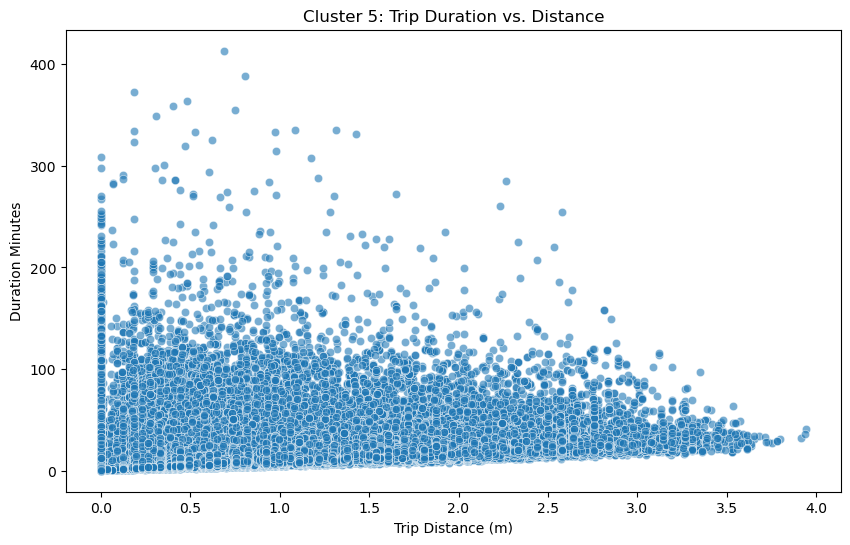

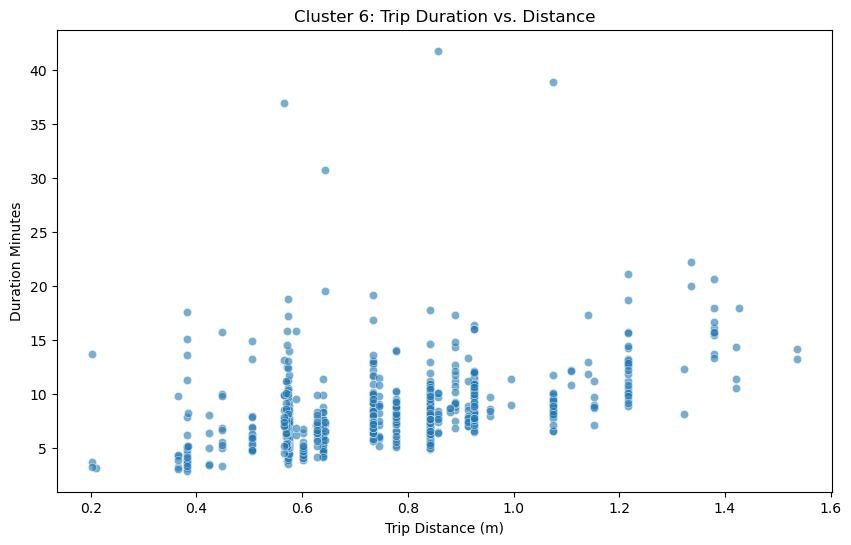

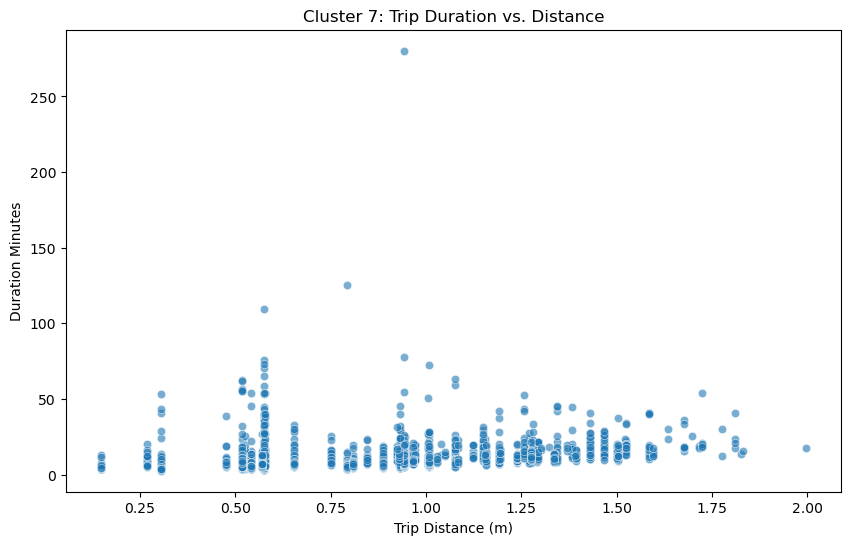

In [10]:
for run in runs:
    
    # Scatter plots of each cluster for duration vs. distance
    clusters = run['clusters'].unique()
    for cluster in sorted(clusters):
        cluster_data = run[run['clusters'] == cluster]
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='trip_distance', y='duration_minutes', data=cluster_data, alpha=0.6)
        plt.title(f'Cluster {cluster}: Trip Duration vs. Distance')
        plt.xlabel('Trip Distance (m)')
        plt.ylabel('Duration Minutes')
        plt.show()


<Figure size 1200x800 with 0 Axes>

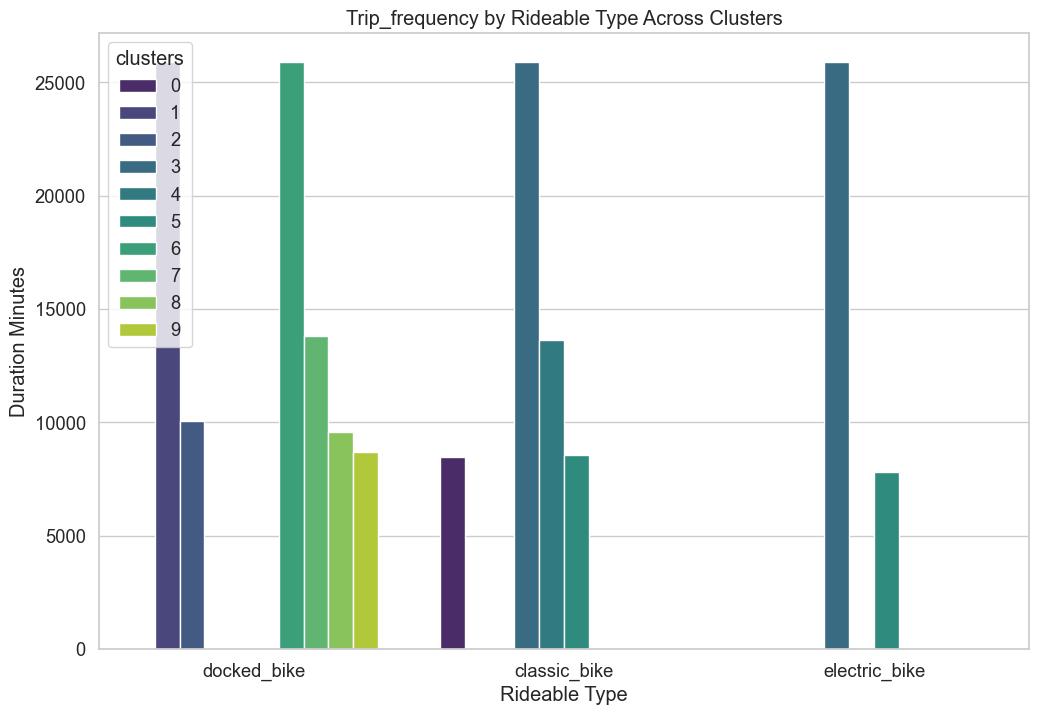

<Figure size 1200x800 with 0 Axes>

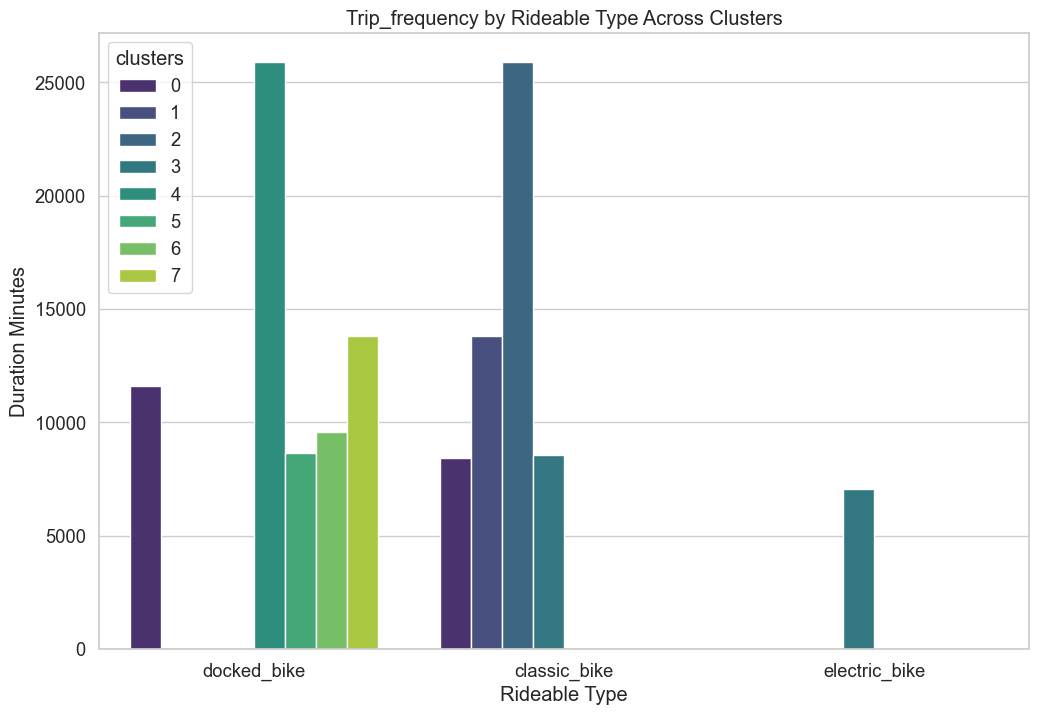

In [23]:
for run in runs: 
    # Box plots of each cluster for duration vs. distance w/ rideable type label
    plt.figure(figsize=(12, 8))
    plt.figure(figsize=(12, 8))
    sns.barplot(x='rideable_type', y='trip_frequency', hue='clusters', data=run, palette="viridis", errorbar=None)
    plt.title('Trip_frequency by Rideable Type Across Clusters')
    plt.xlabel('Rideable Type')
    plt.ylabel('Duration Minutes')
    plt.show()

In [68]:
seasons = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
for i in range(len(runs)):
    # Map season_ordinal to Season
    runs[i]['Season'] = runs[i]['season_ordinal'].map(seasons)


/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_99837/3600774639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs[i]['Season'] = runs[i]['season_ordinal'].map(seasons)
/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_99837/3600774639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs[i]['Season'] = runs[i]['season_ordinal'].map(seasons)


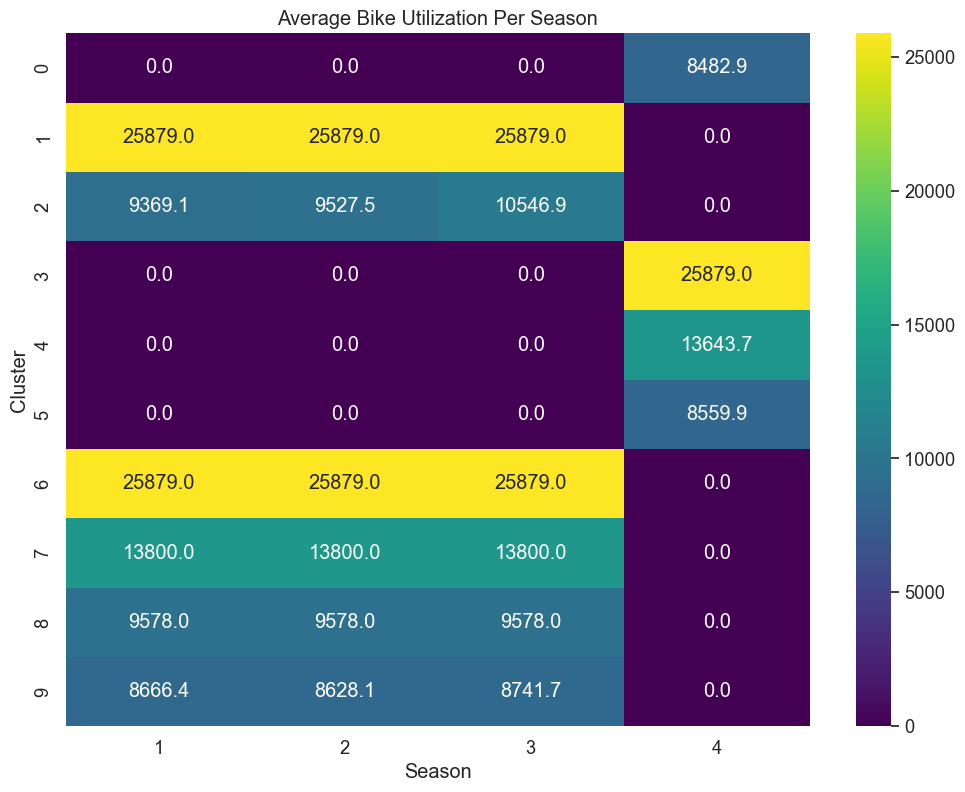

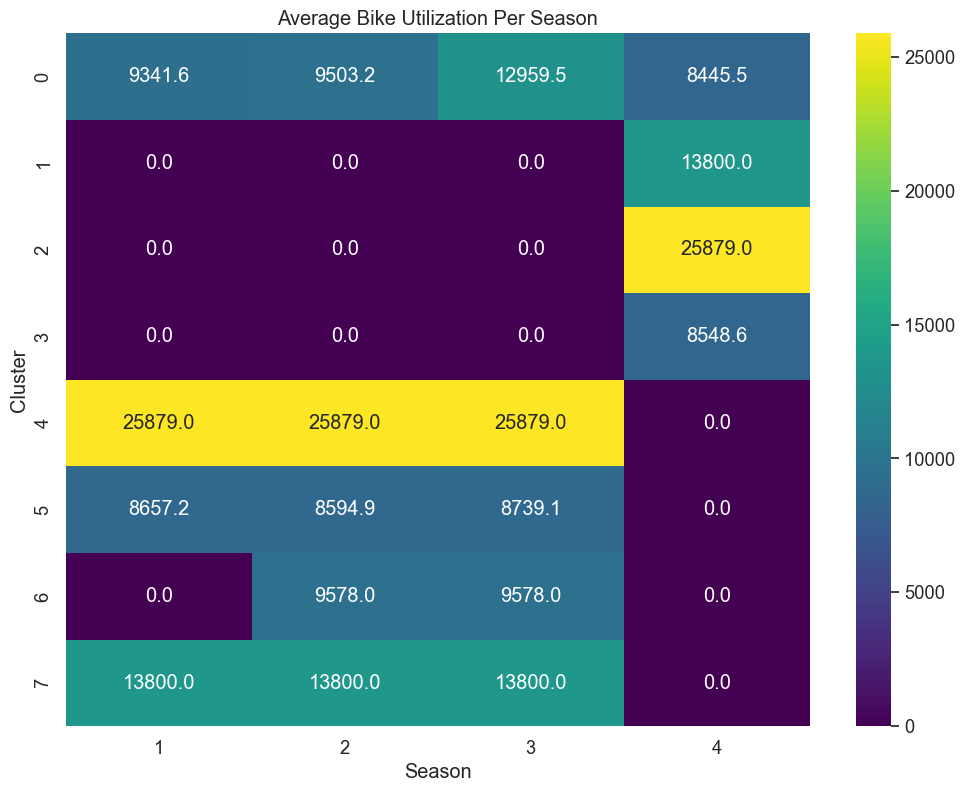

In [39]:
for run in runs:

    # Average bike capacity by season and cluster
    pivot_table = run.pivot_table(values='trip_frequency', index='clusters', 
                                  columns='season_ordinal', aggfunc='mean')

    # Fill null values with zero
    pivot_table_filled = pivot_table.fillna(0)

    plt.figure(figsize=(12, 9))
    sns.heatmap(pivot_table_filled, cmap="viridis", annot=True, fmt=".1f")
    plt.title('Average Bike Utilization Per Season')
    plt.xlabel('Season')
    plt.ylabel('Cluster')
    plt.show()


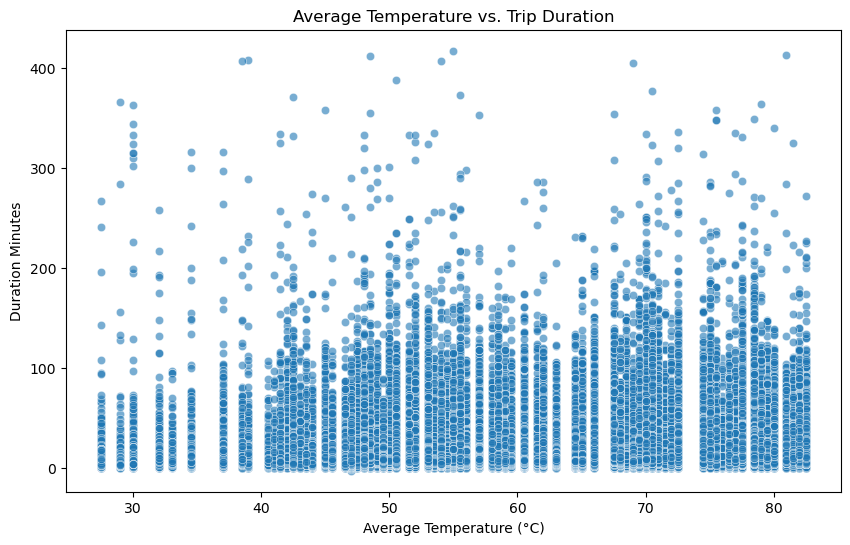

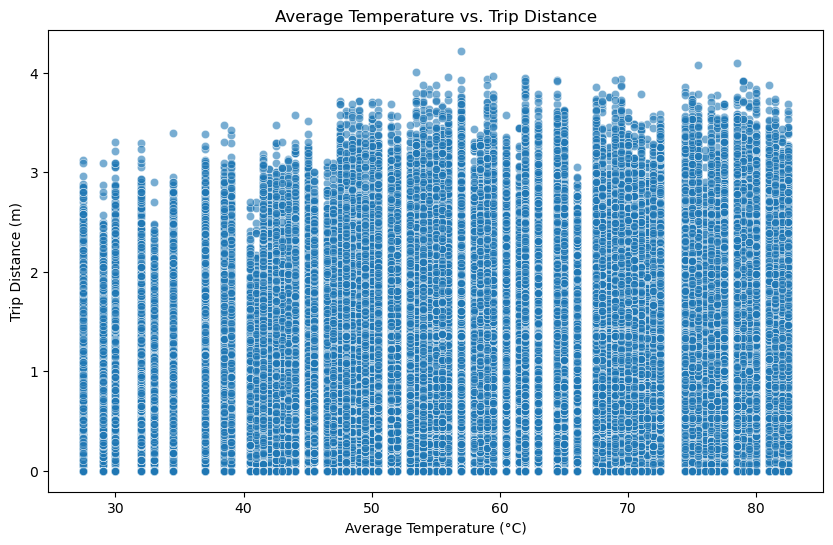

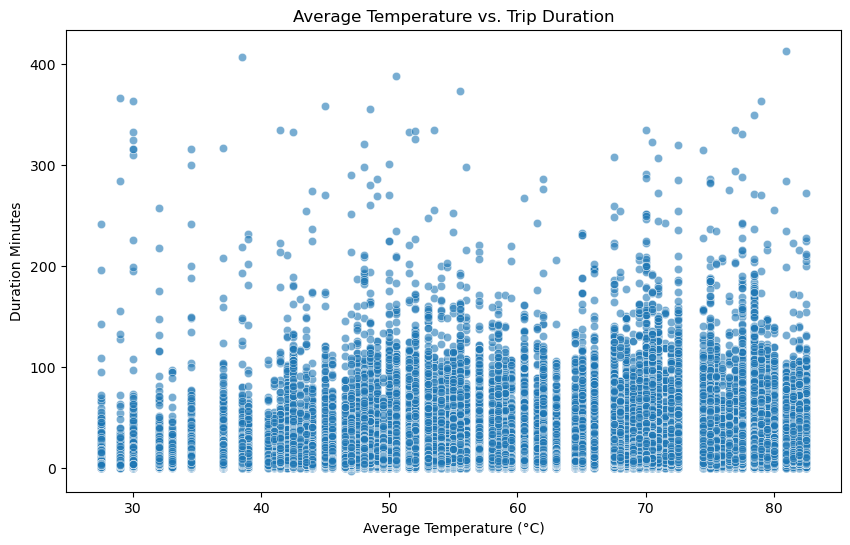

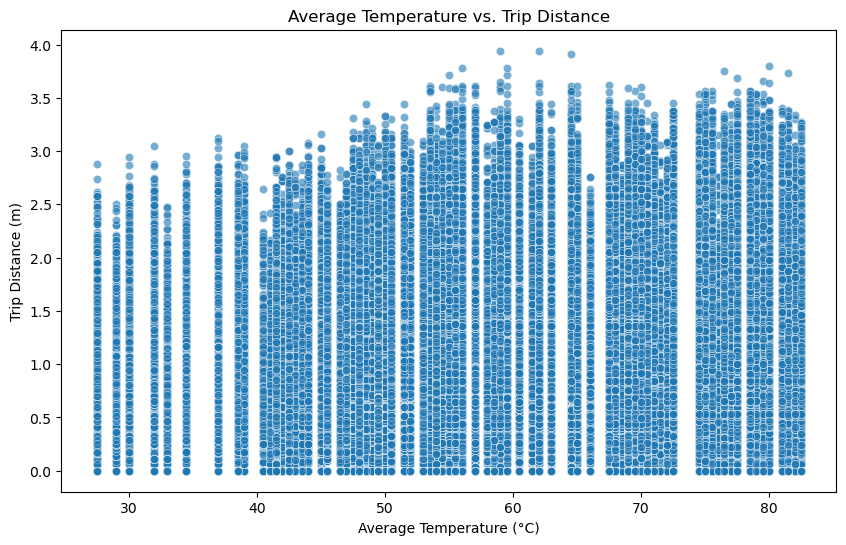

In [13]:
for run in runs:
    # Scatter plot for AvgTemp vs. Duration Minutes
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='AvgTemp', y='duration_minutes', data=run, alpha=0.6)
    plt.title('Average Temperature vs. Trip Duration')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Duration Minutes')
    plt.show()

    # Scatter plot for AvgTemp vs. Trip Distance
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='AvgTemp', y='trip_distance', data=run, alpha=0.6)
    plt.title('Average Temperature vs. Trip Distance')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Trip Distance (m)')
    plt.show()

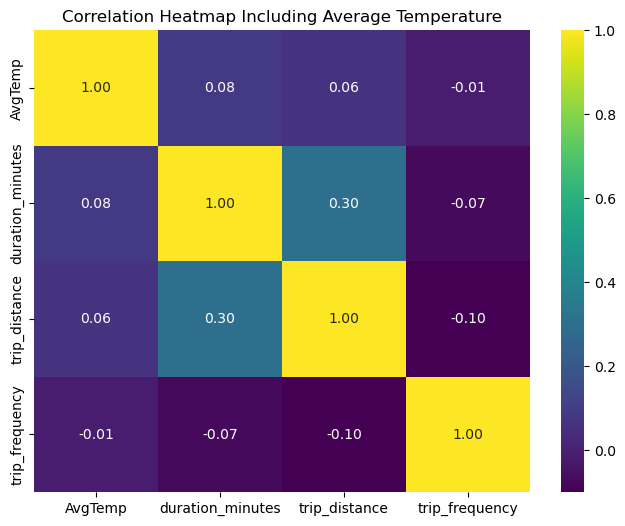

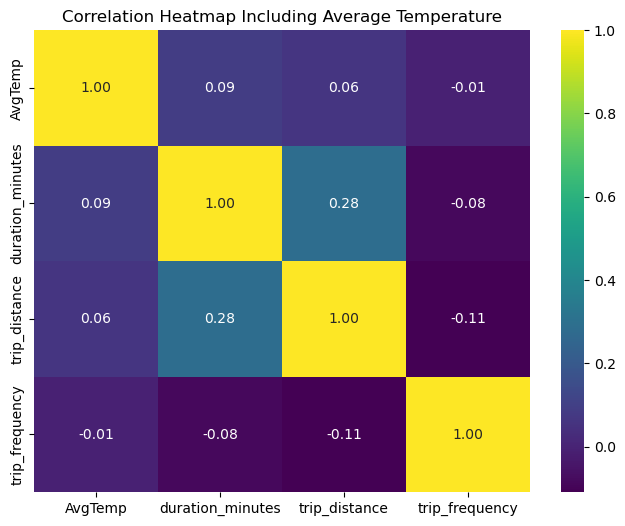

In [14]:
for run in runs:
    # Calculating and displaying correlation coefficients
    temp_correlation_metrics = run[['AvgTemp', 'duration_minutes', 'trip_distance', 'trip_frequency']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(temp_correlation_metrics, annot=True, cmap="viridis", fmt=".2f")
    plt.title('Correlation Heatmap Including Average Temperature')
    plt.show()

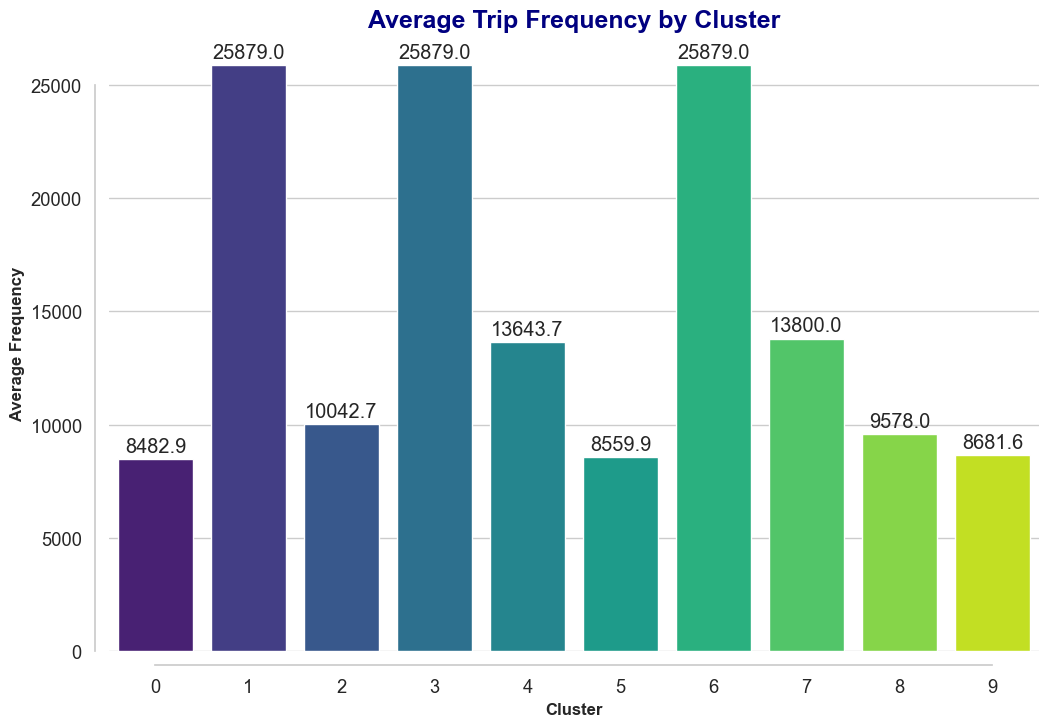

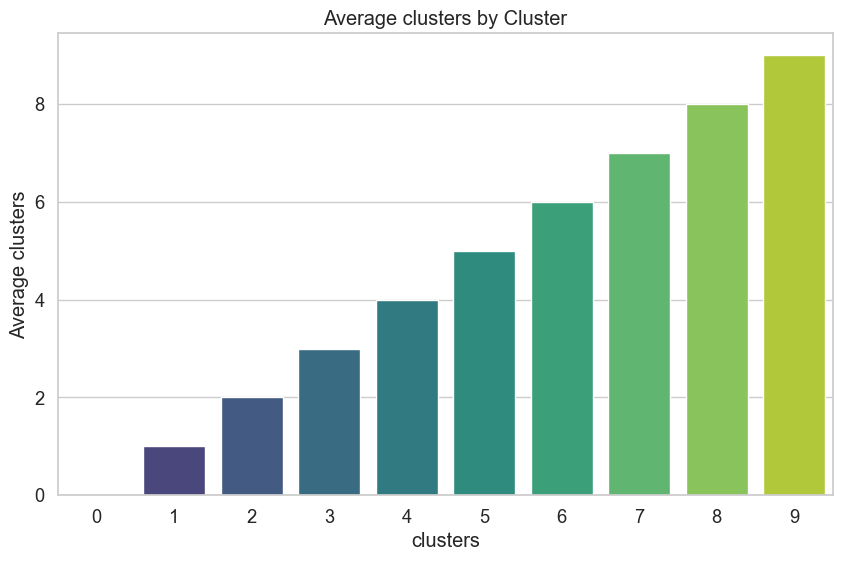

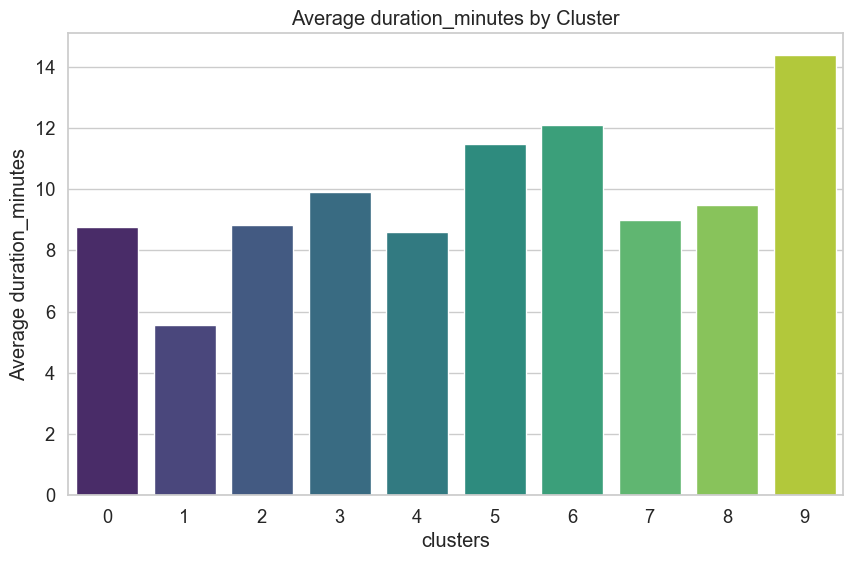

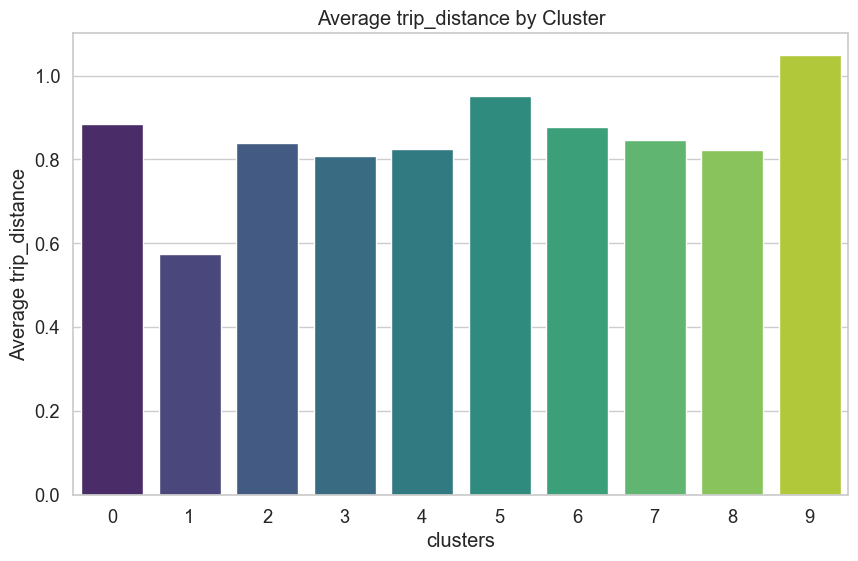

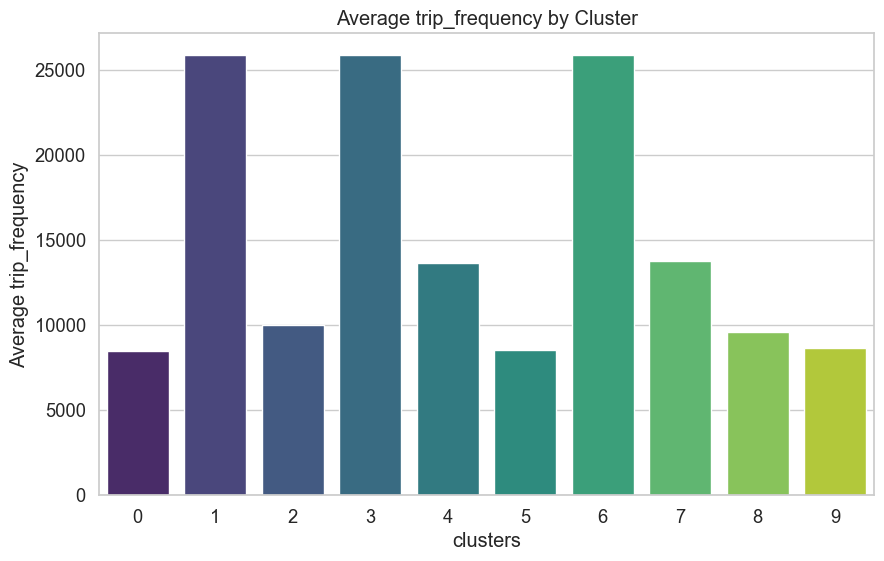

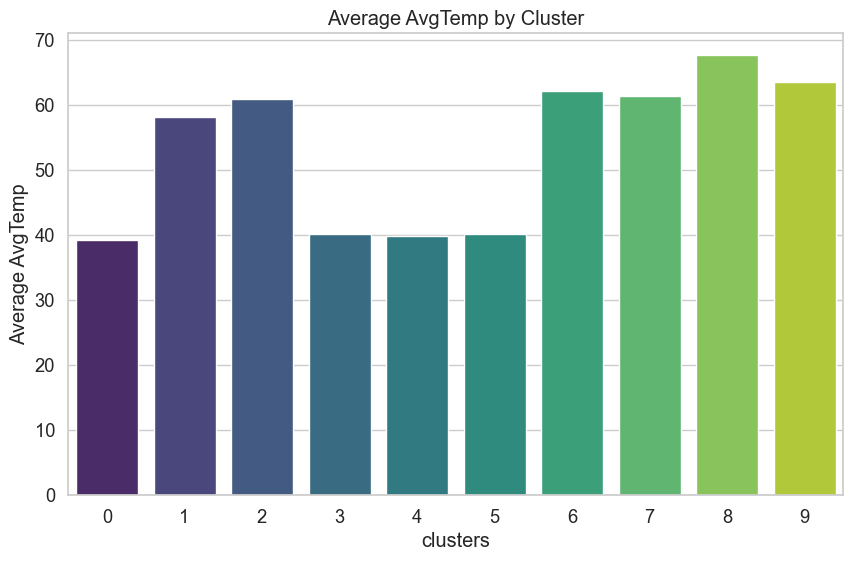

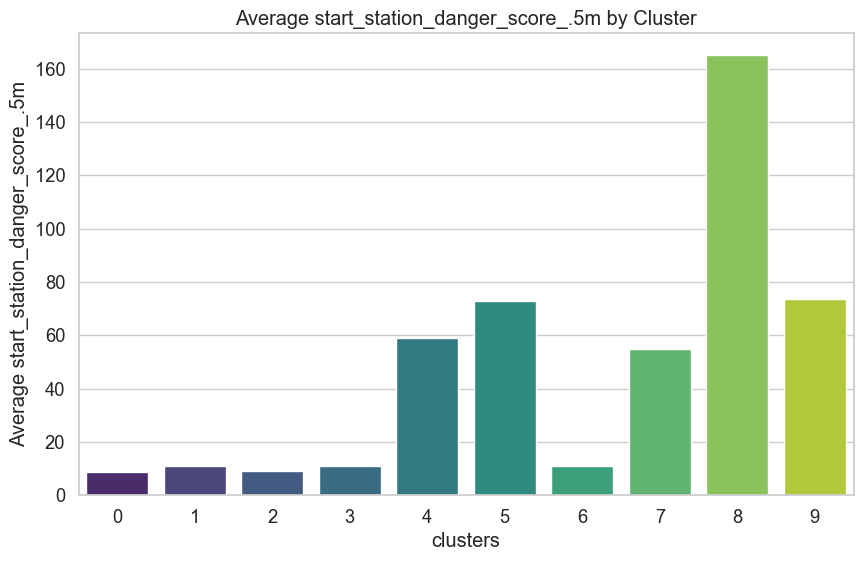

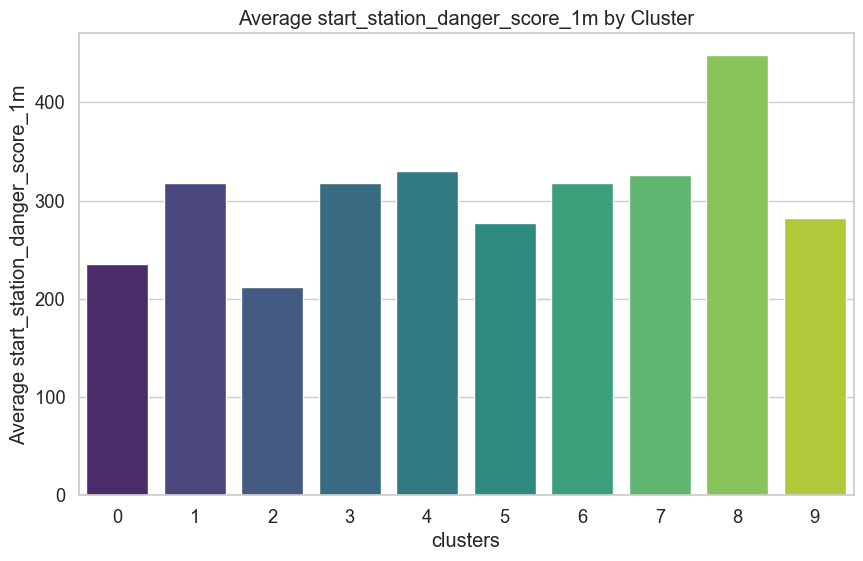

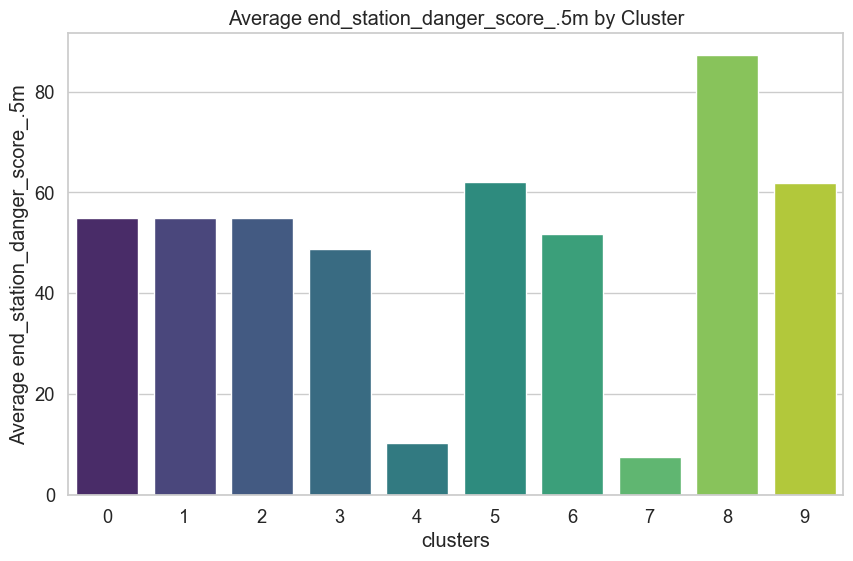

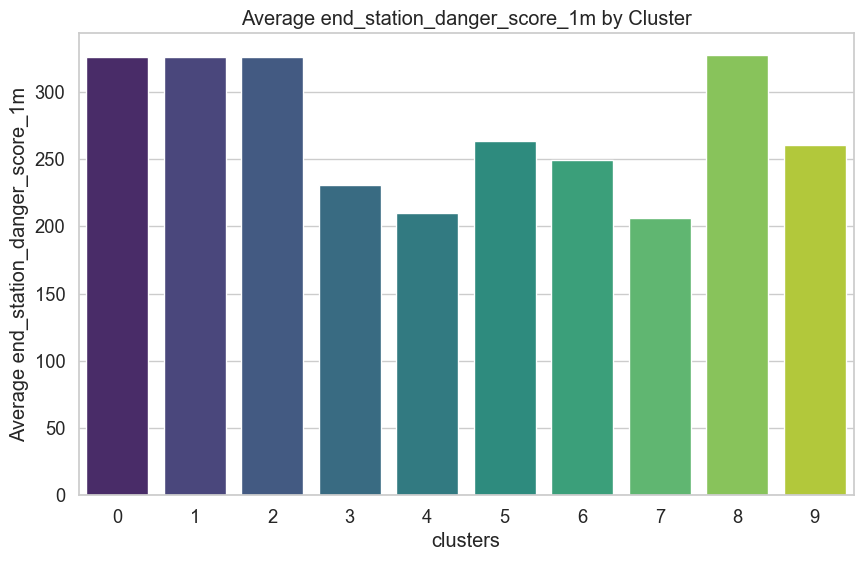

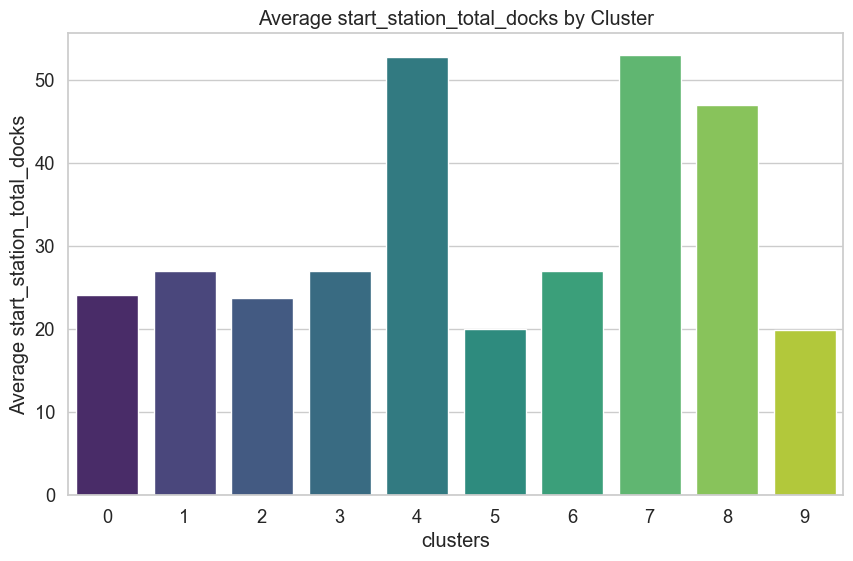

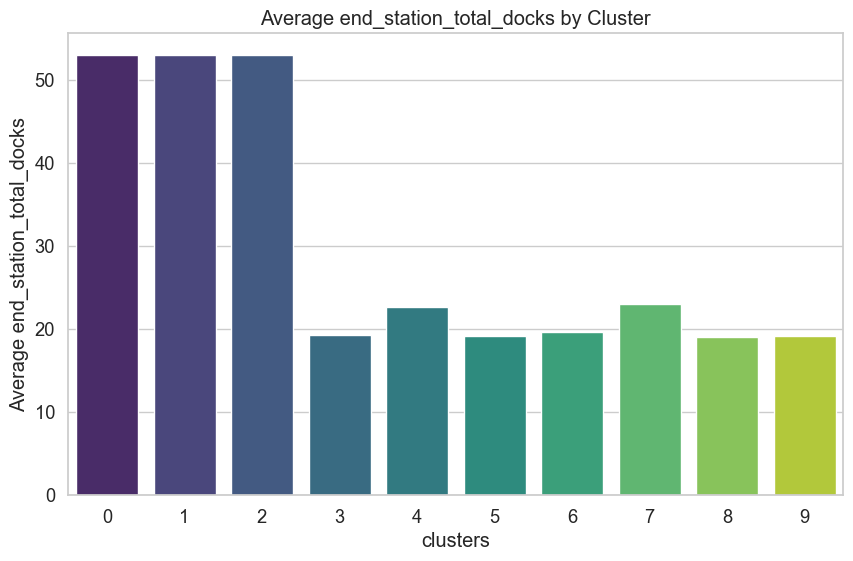

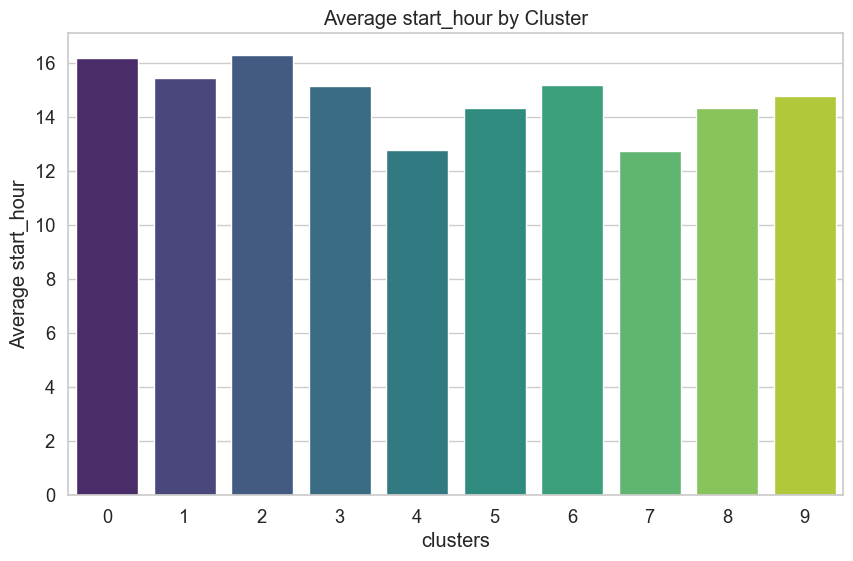

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Aggregating key metrics by cluster for first run 
average_metrics_per_clusters = runs[0].groupby('clusters').agg({
    'duration_minutes': 'mean',
    'trip_distance': 'mean',
    'trip_frequency': 'mean',
    'AvgTemp': 'mean',
    'start_station_danger_score_.5m': 'mean',
    'start_station_danger_score_1m': 'mean',
    'end_station_danger_score_.5m': 'mean',
    'end_station_danger_score_1m': 'mean',
    'start_station_total_docks': 'mean', 
    'end_station_total_docks': 'mean',
    'start_hour': 'mean'

}).reset_index()


plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

barplot = sns.barplot(
    x='clusters', 
    y="trip_frequency", 
    data=average_metrics_per_clusters, 
    palette="viridis",
    saturation=1
)

# Add value labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Customizing the plot
plt.title('Average Trip Frequency by Cluster', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Average Frequency', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
sns.despine(offset=10, trim=True)  # Offset and trim the spines for a cleaner look

plt.show()




for column in average_metrics_per_clusters:
    
    # Visualize averages across clusters
    plt.figure(figsize=(10, 6))
    sns.barplot(x='clusters', y= column, data=average_metrics_per_clusters, palette="viridis")
    plt.title(f'Average {column} by Cluster')
    plt.ylabel(f'Average {column}' )
    plt.show()


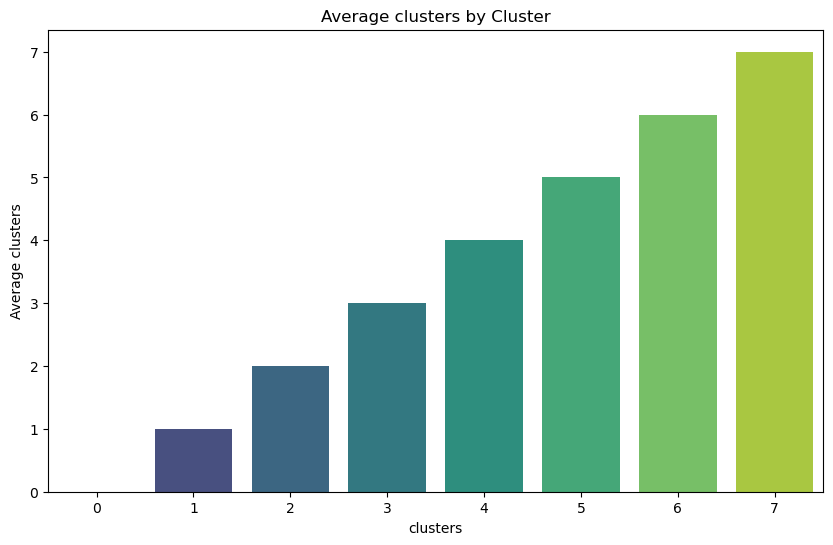

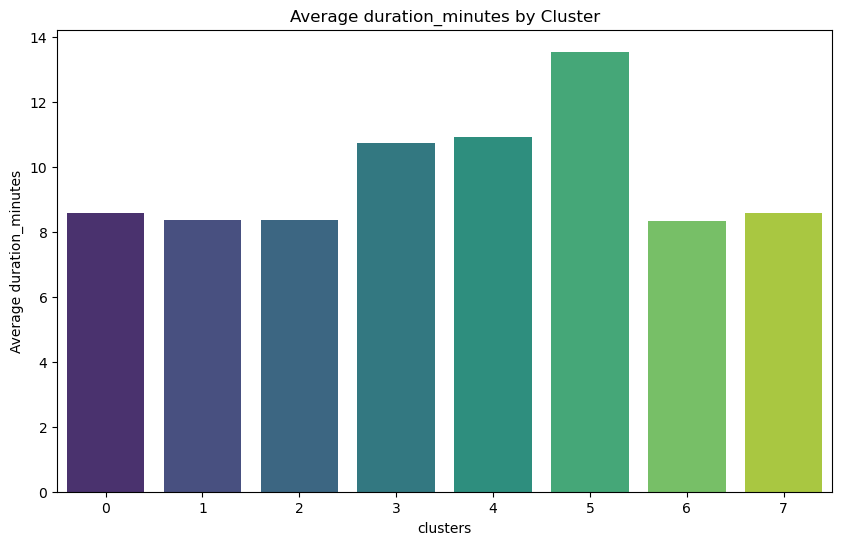

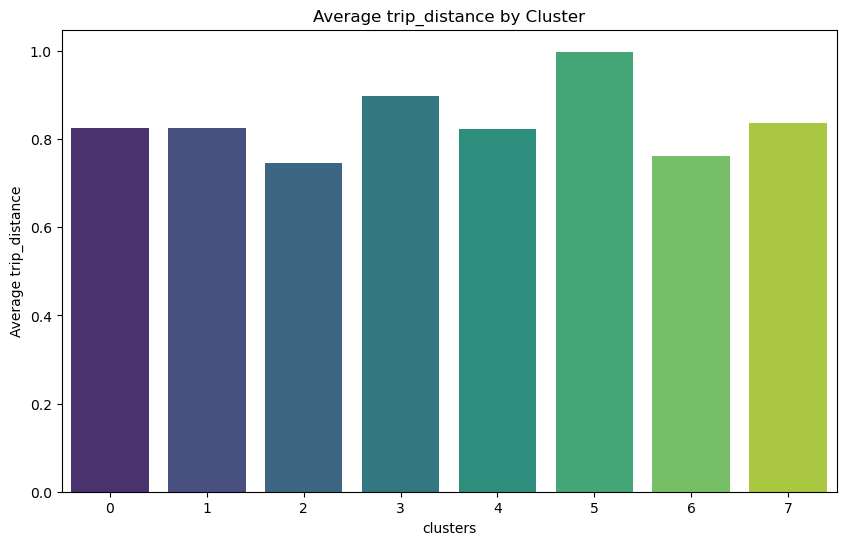

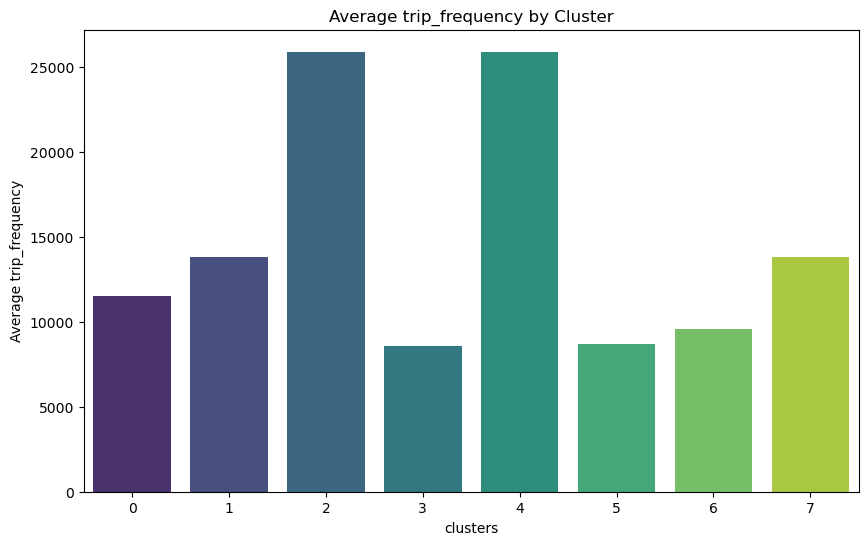

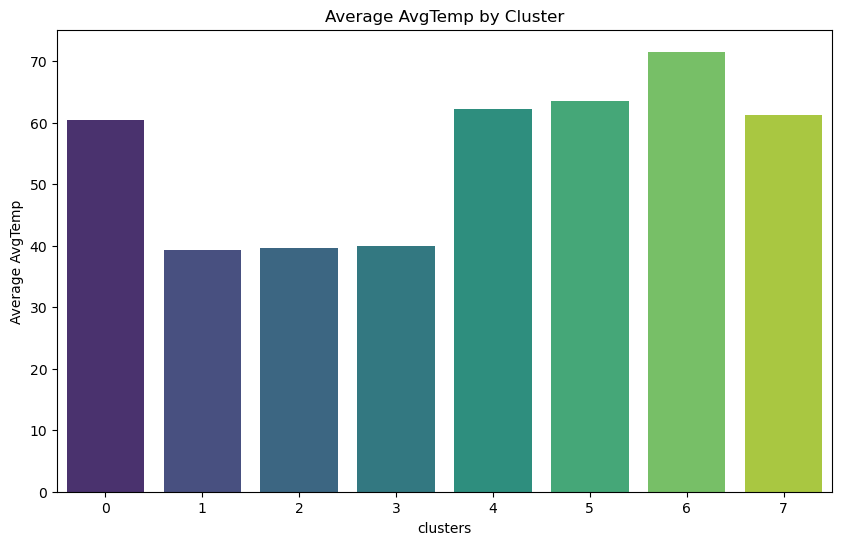

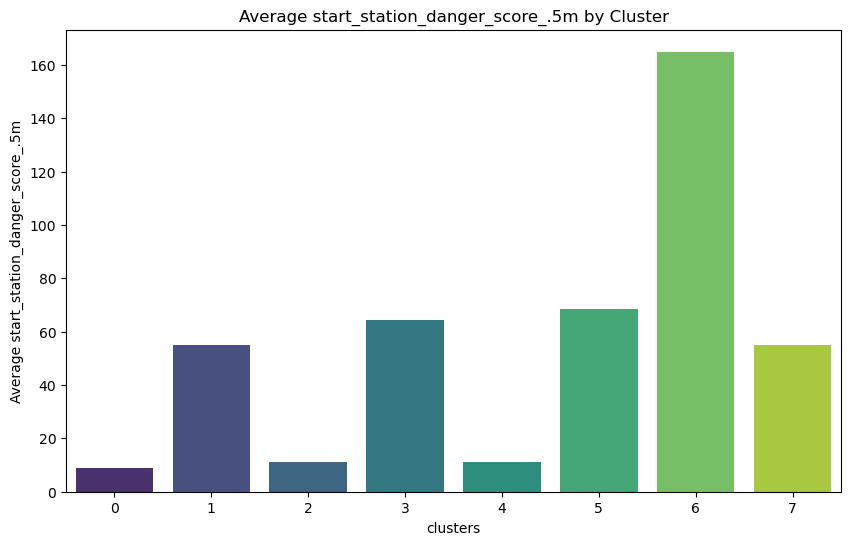

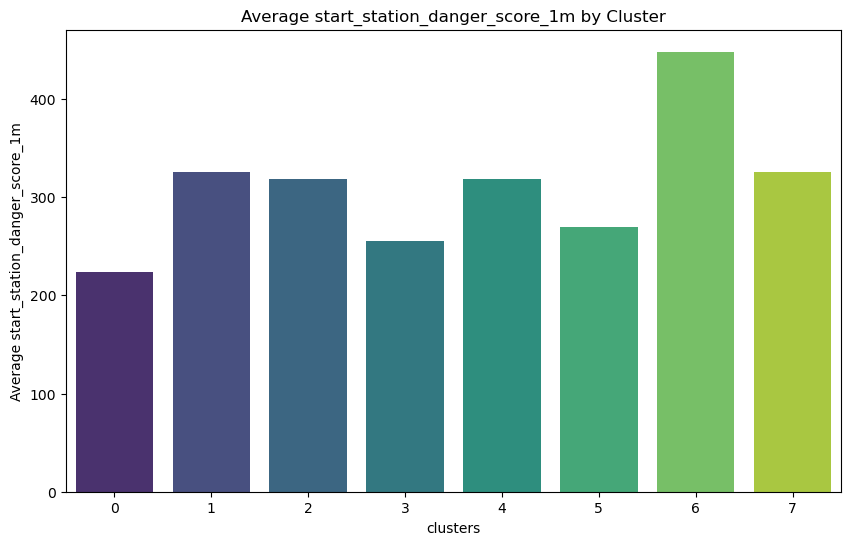

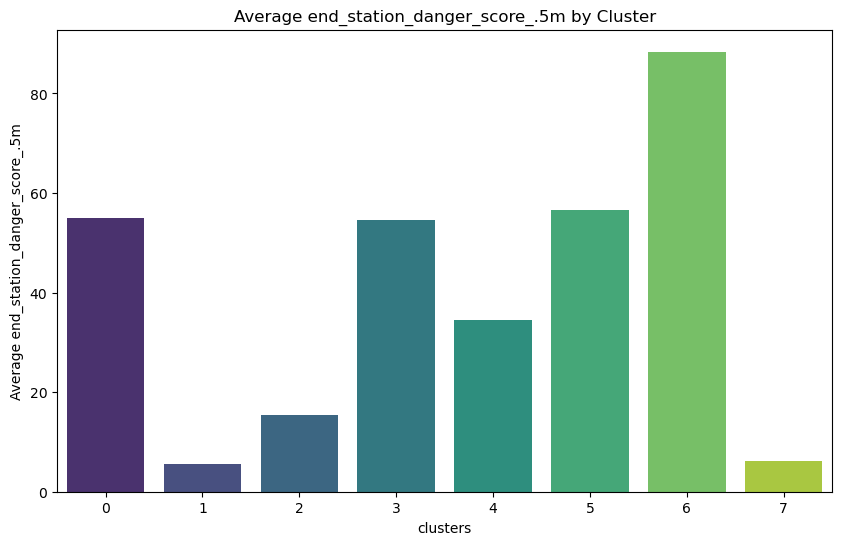

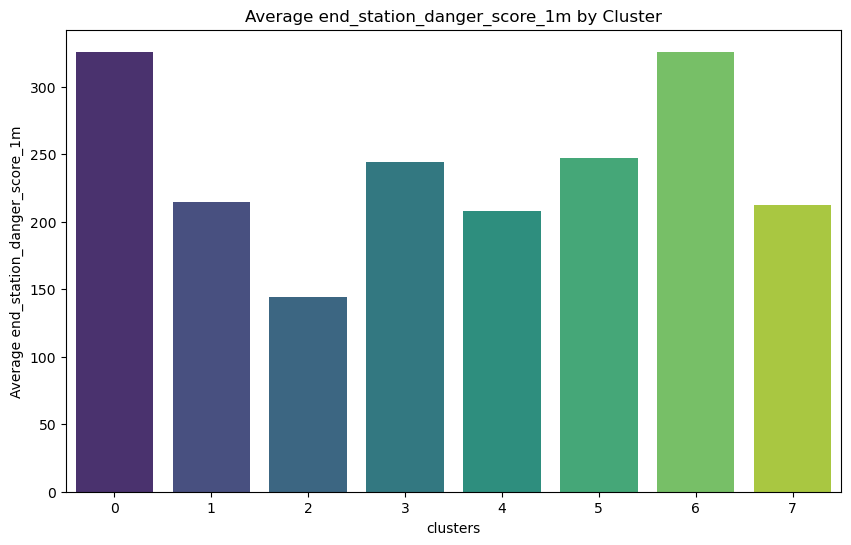

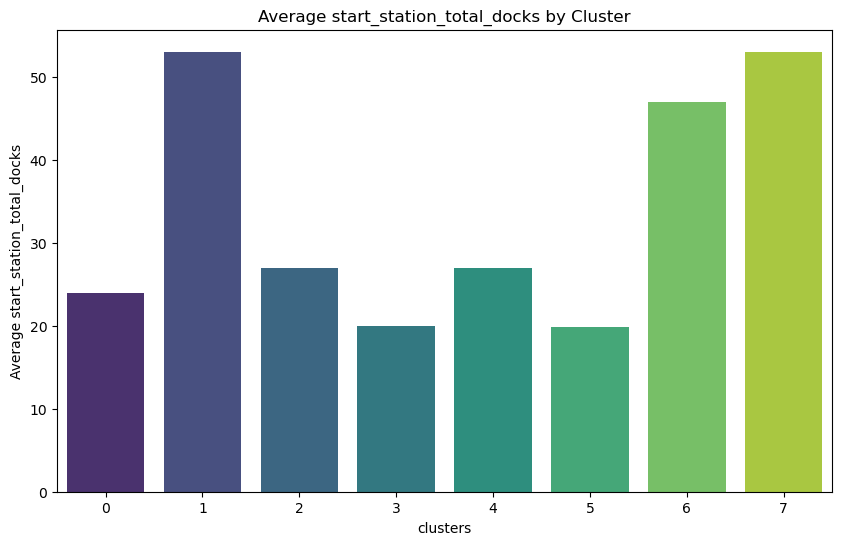

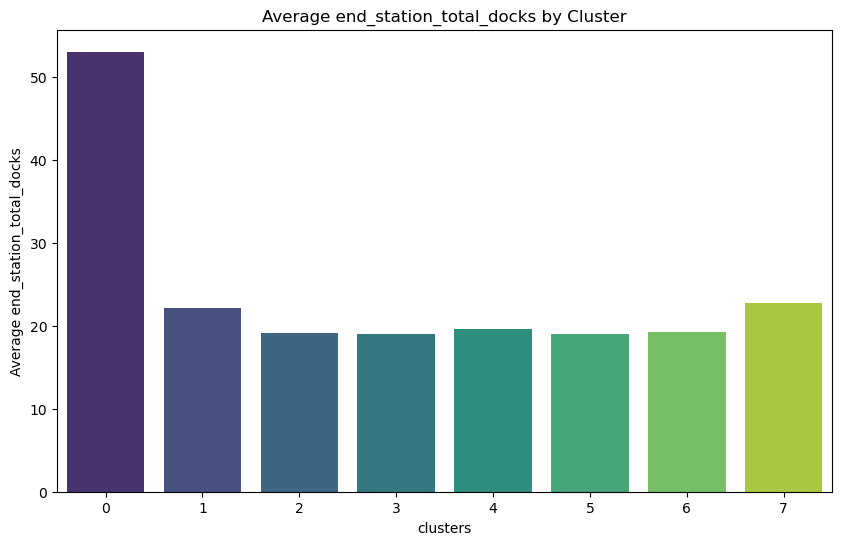

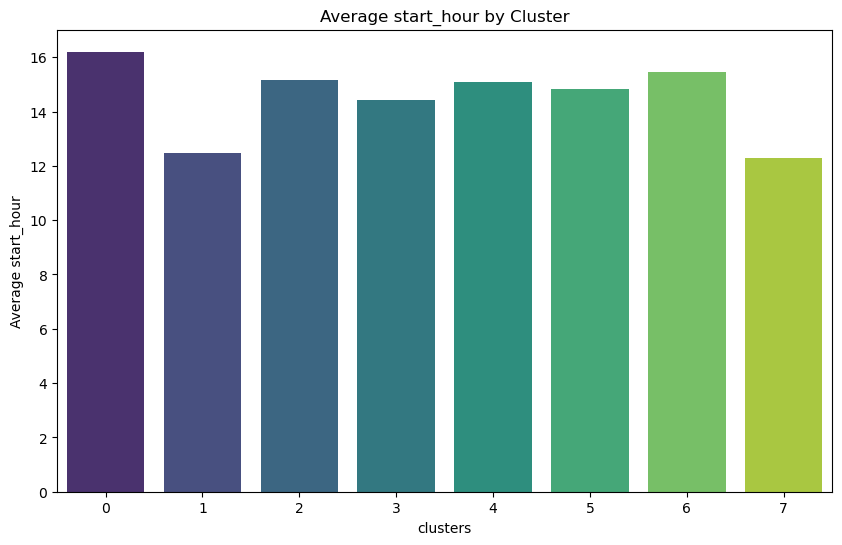

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Aggregating key metrics by cluster for first run 
average_metrics_per_clusters = runs[1].groupby('clusters').agg({
    'duration_minutes': 'mean',
    'trip_distance': 'mean',
    'trip_frequency': 'mean',
    'AvgTemp': 'mean',
    'start_station_danger_score_.5m': 'mean',
    'start_station_danger_score_1m': 'mean',
    'end_station_danger_score_.5m': 'mean',
    'end_station_danger_score_1m': 'mean',
    'start_station_total_docks': 'mean', 
    'end_station_total_docks': 'mean',
    'start_hour': 'mean'

}).reset_index()

for column in average_metrics_per_clusters:
    
    # Visualize averages across clusters
    plt.figure(figsize=(10, 6))
    sns.barplot(x='clusters', y= column, data=average_metrics_per_clusters, palette="viridis")
    plt.title(f'Average {column} by Cluster')
    plt.ylabel(f'Average {column}' )
    plt.show()


In [17]:
run1.start_station_district.unique()

array(['Cambridge', 'Boston', 'Somerville'], dtype=object)

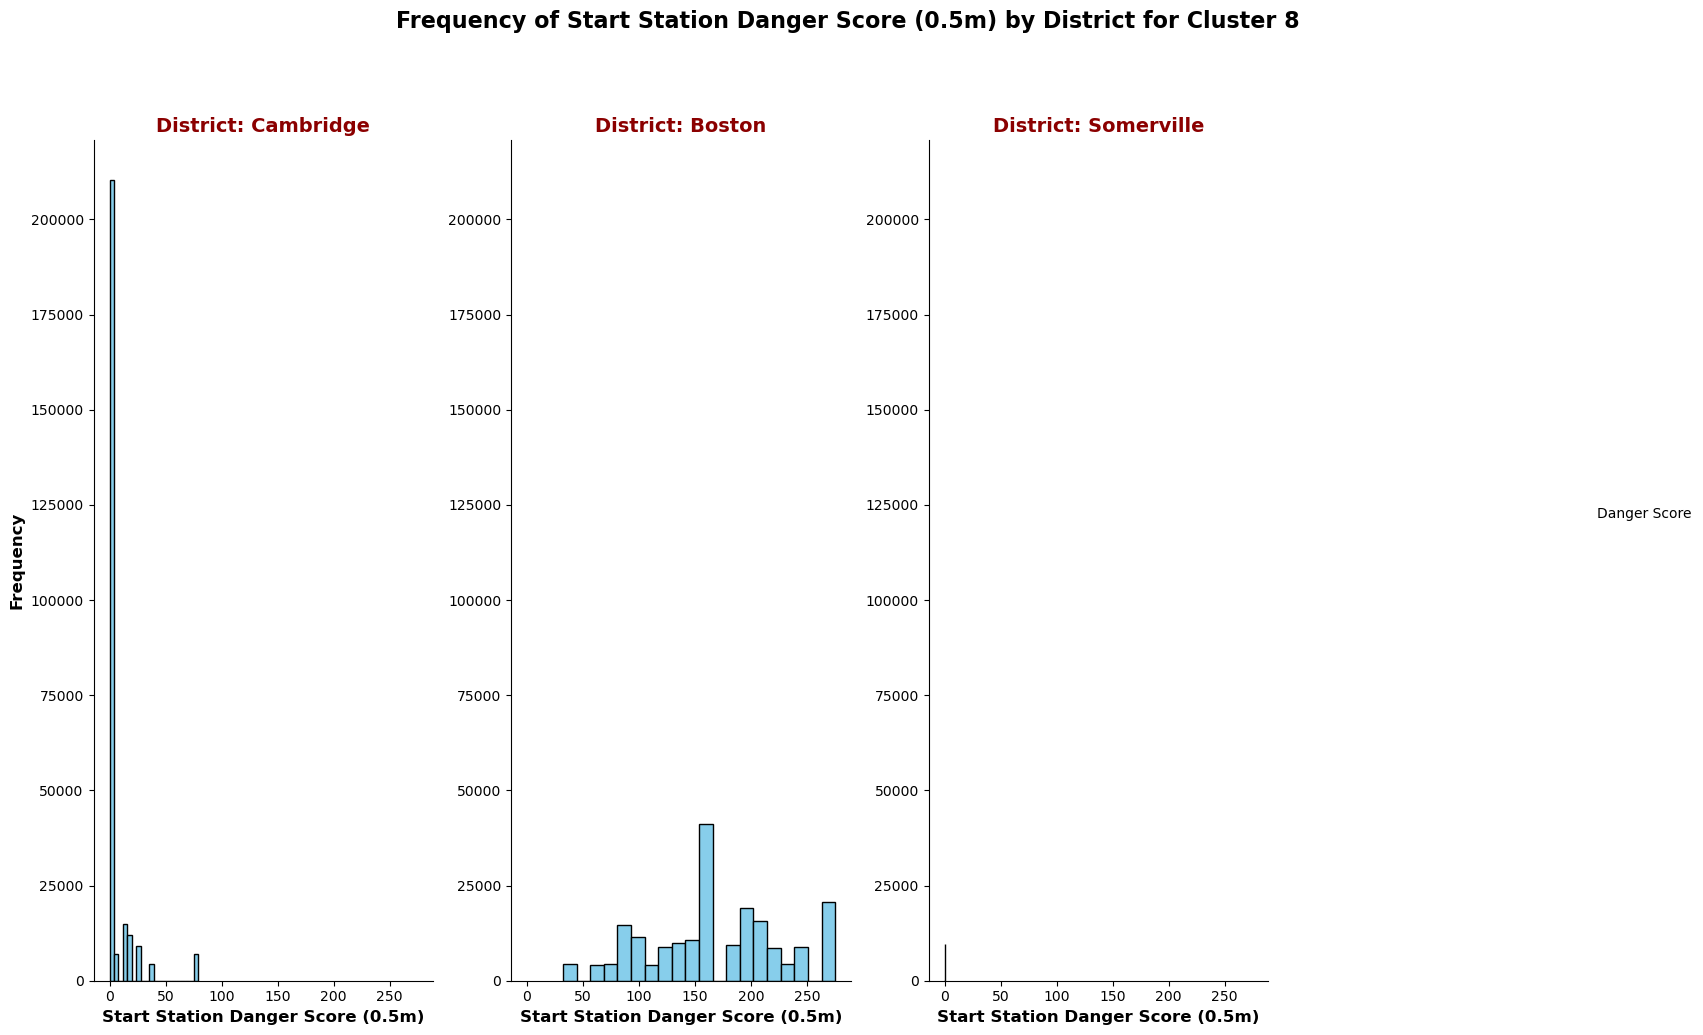

In [18]:
# Plot Danger Socre by District for Cluster 8 

# Filter 10 cluster dataframe for only cluster 8
cluster_danger = runs[0][runs[0]['clusters'].isin([5, 8, 9])]

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cluster_8' is already filtered from your DataFrame
# Create a FacetGrid to plot a histogram for 'start_station_danger_score_.5m' by 'start_station_district'
g = sns.FacetGrid(cluster_danger, col='start_station_district', col_wrap=4, sharex=True, sharey=True, palette="coolwarm")
g.map(plt.hist, 'start_station_danger_score_.5m', bins=20, color='skyblue', edgecolor='black')

# Enhancements for a cooler look
g.fig.suptitle("Frequency of Start Station Danger Score (0.5m) by District for Cluster 8", y=1.03, fontsize=16, fontweight='bold')
g.set_axis_labels("Start Station Danger Score (0.5m)", "Frequency")
g.set_titles("District: {col_name}", fontweight='bold', color='navy')

# Customizing the FacetGrid's appearance
g.fig.set_figwidth(16)
g.fig.set_figheight(10)
g.add_legend(title="Danger Score")

# Looping through the axes to add customizations
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft=True)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='bold')
    ax.set_title(ax.get_title(), fontsize=14, fontweight='bold', color='darkred')

# Adjust the layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle
plt.show()


/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_99837/4195710662.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = frequency_count.pivot("start_station_district", "clusters", "count").fillna(0)


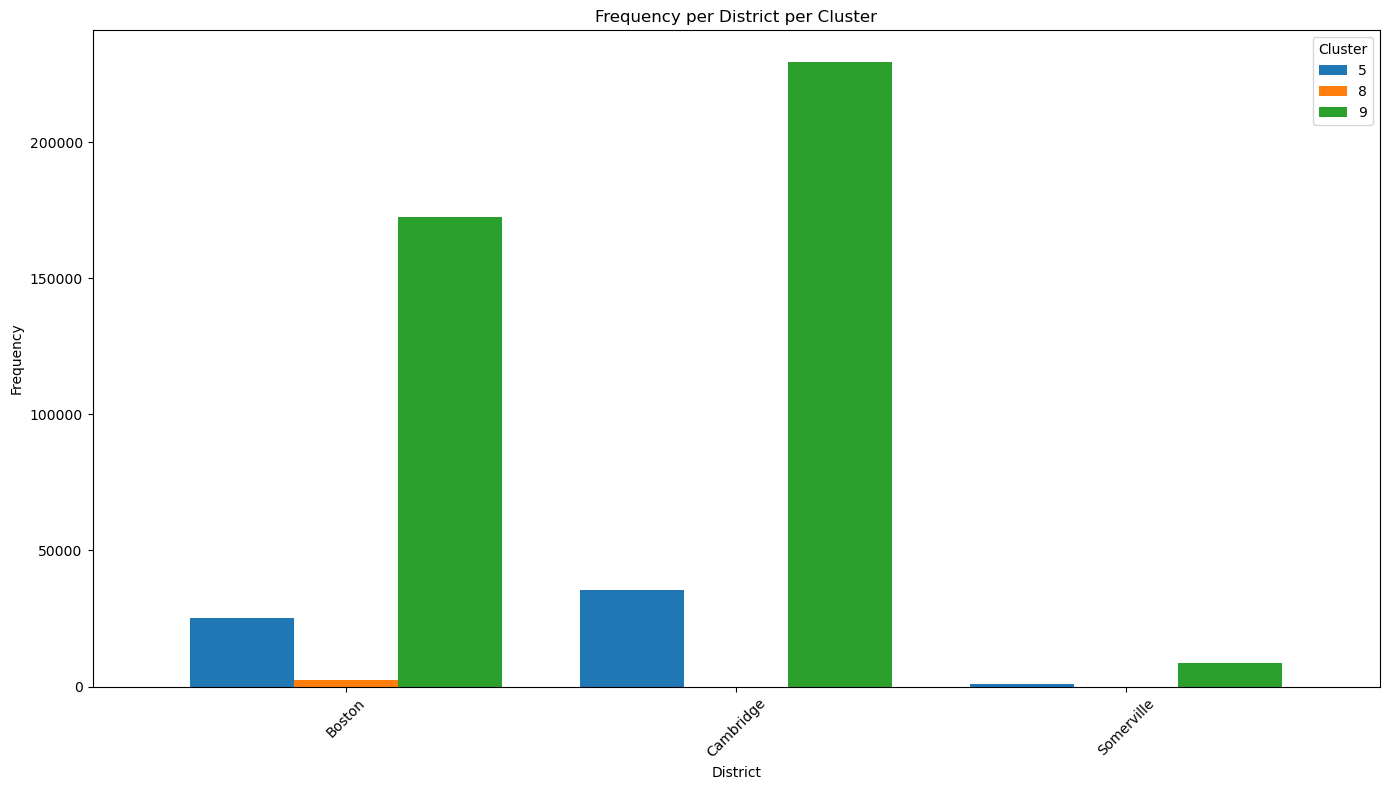

In [19]:
# Frequency Plot by start_station_district

frequency_count = cluster_danger.groupby(['clusters', 'start_station_district']).size().reset_index(name='count')

frequency_count = frequency_count.sort_values(['clusters', 'count'], ascending=[True, False])

frequency_count

# Pivot the data for plotting: rows are districts, columns are clusters, and values are frequencies.
pivot_df = frequency_count.pivot("start_station_district", "clusters", "count").fillna(0)

# Create a bar plot
pivot_df.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Frequency per District per Cluster')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

/var/folders/6d/9rvxd19n109g8mm64w_z7s100000gn/T/ipykernel_99837/2912293172.py:12: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  plot_data['start_station_district'].cat.set_categories(pivot_df.sum(axis=1).sort_values(ascending=False).index, inplace=True)


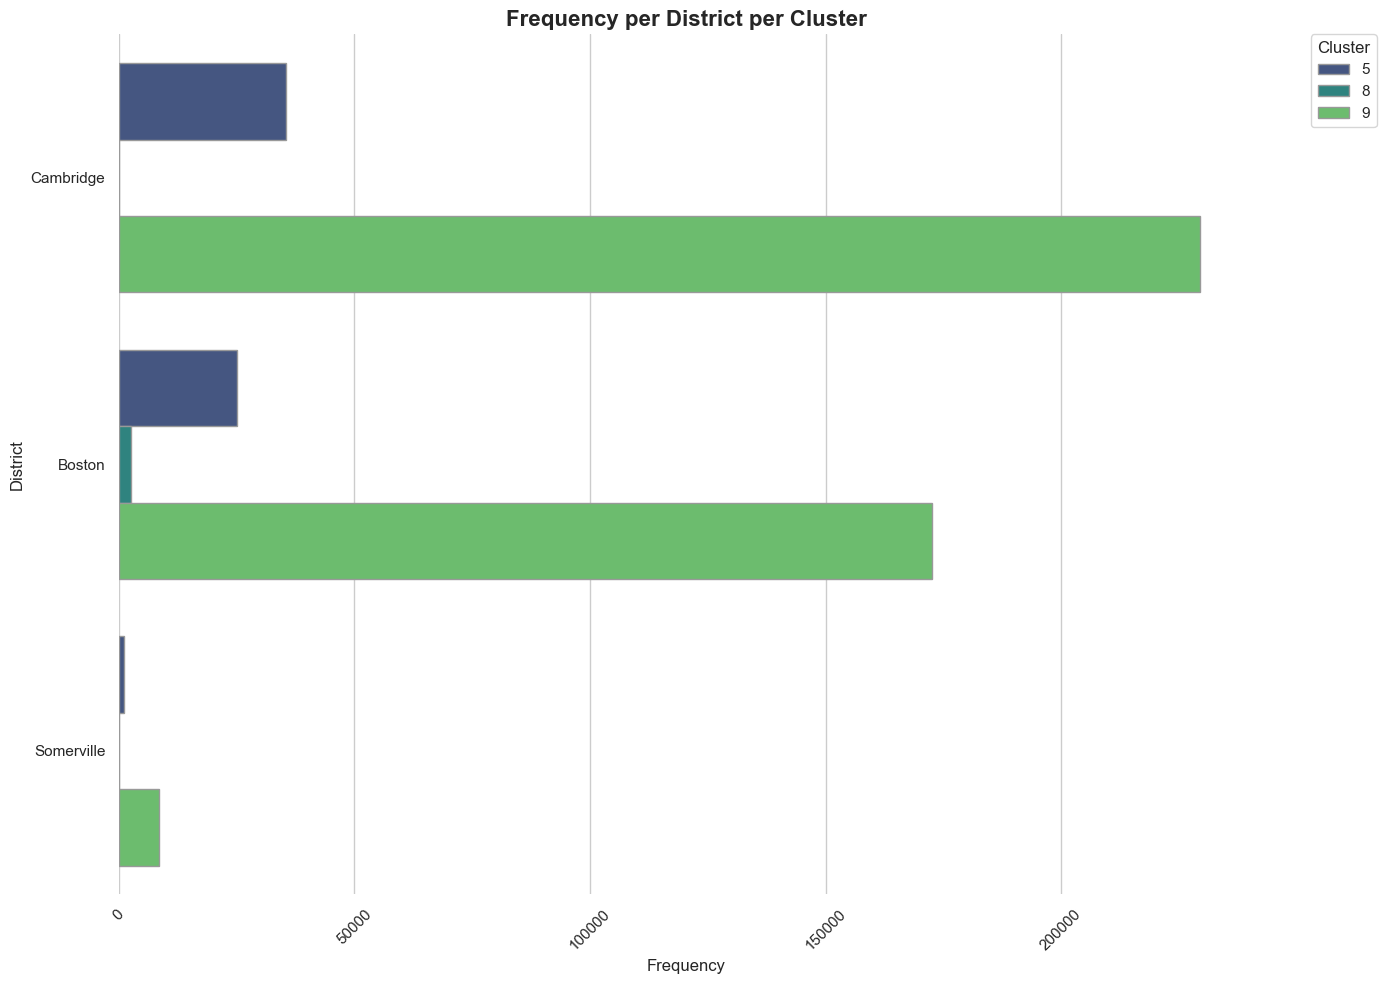

In [20]:
# Convert the pivot table back to a DataFrame for seaborn plotting
plot_data = pivot_df.reset_index().melt(id_vars='start_station_district', var_name='clusters', value_name='count')

# Setting the seaborn style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 10))

# Sort data to ensure districts with higher counts are plotted first
plot_data['start_station_district'] = plot_data['start_station_district'].astype('category')
plot_data['start_station_district'].cat.set_categories(pivot_df.sum(axis=1).sort_values(ascending=False).index, inplace=True)

# Plotting
sns.barplot(x="count", y="start_station_district", hue="clusters", data=plot_data, palette="viridis", edgecolor=".6")

# Customizing the aesthetics
sns.despine(left=True, bottom=True)

# Customizing the legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Adding titles and labels
ax.set_title('Frequency per District per Cluster', fontsize=16, fontweight='bold')
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('District', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

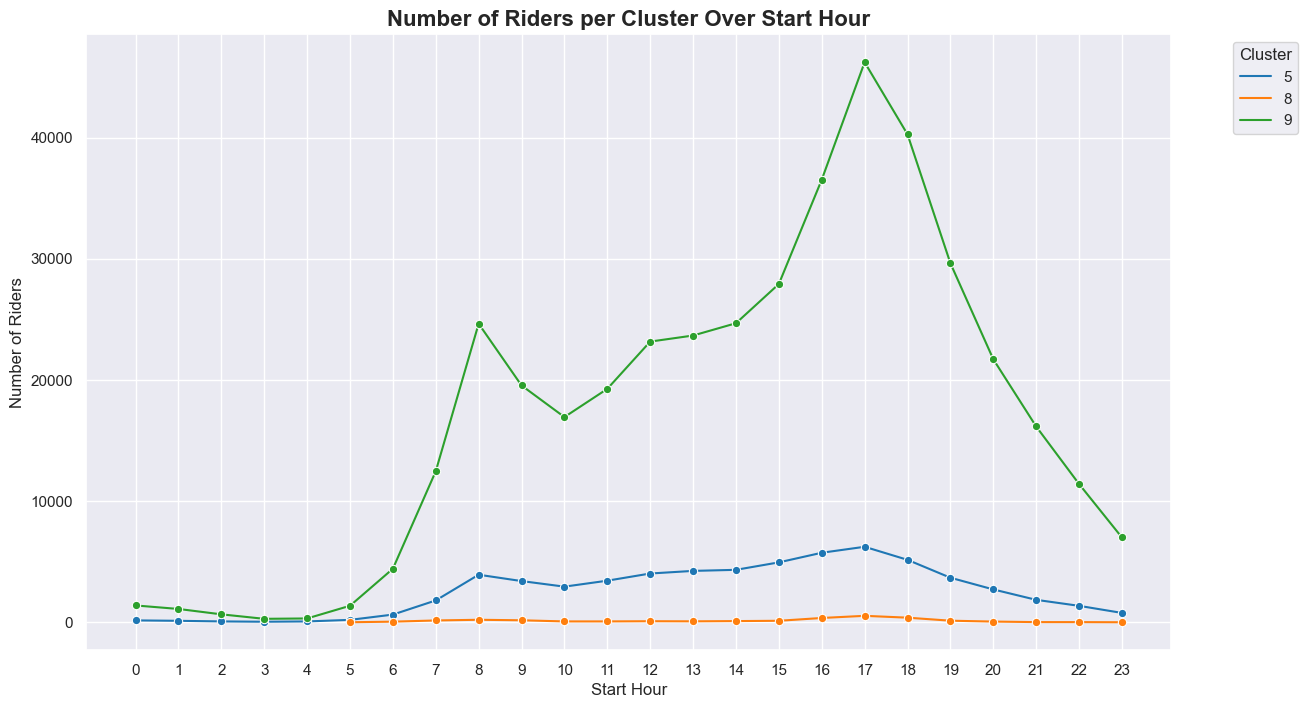

In [21]:
# Aggregate the number of rides per cluster per start_hour
rides_per_cluster_hour = cluster_danger.groupby(['clusters', 'start_hour']).size().reset_index(name='num_riders')

# Setting the aesthetic style of the plots
sns.set(style="darkgrid")

# Create a line plot of number of riders per cluster over start_hour
plt.figure(figsize=(14, 8))
sns.lineplot(data=rides_per_cluster_hour, x='start_hour', y='num_riders', hue='clusters', palette='tab10', marker='o')

# Customizing the plot
plt.title('Number of Riders per Cluster Over Start Hour', fontsize=16, fontweight='bold')
plt.xlabel('Start Hour', fontsize=12)
plt.ylabel('Number of Riders', fontsize=12)
plt.xticks(range(0, 24))  # Assuming start_hour is in 24-hour format
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

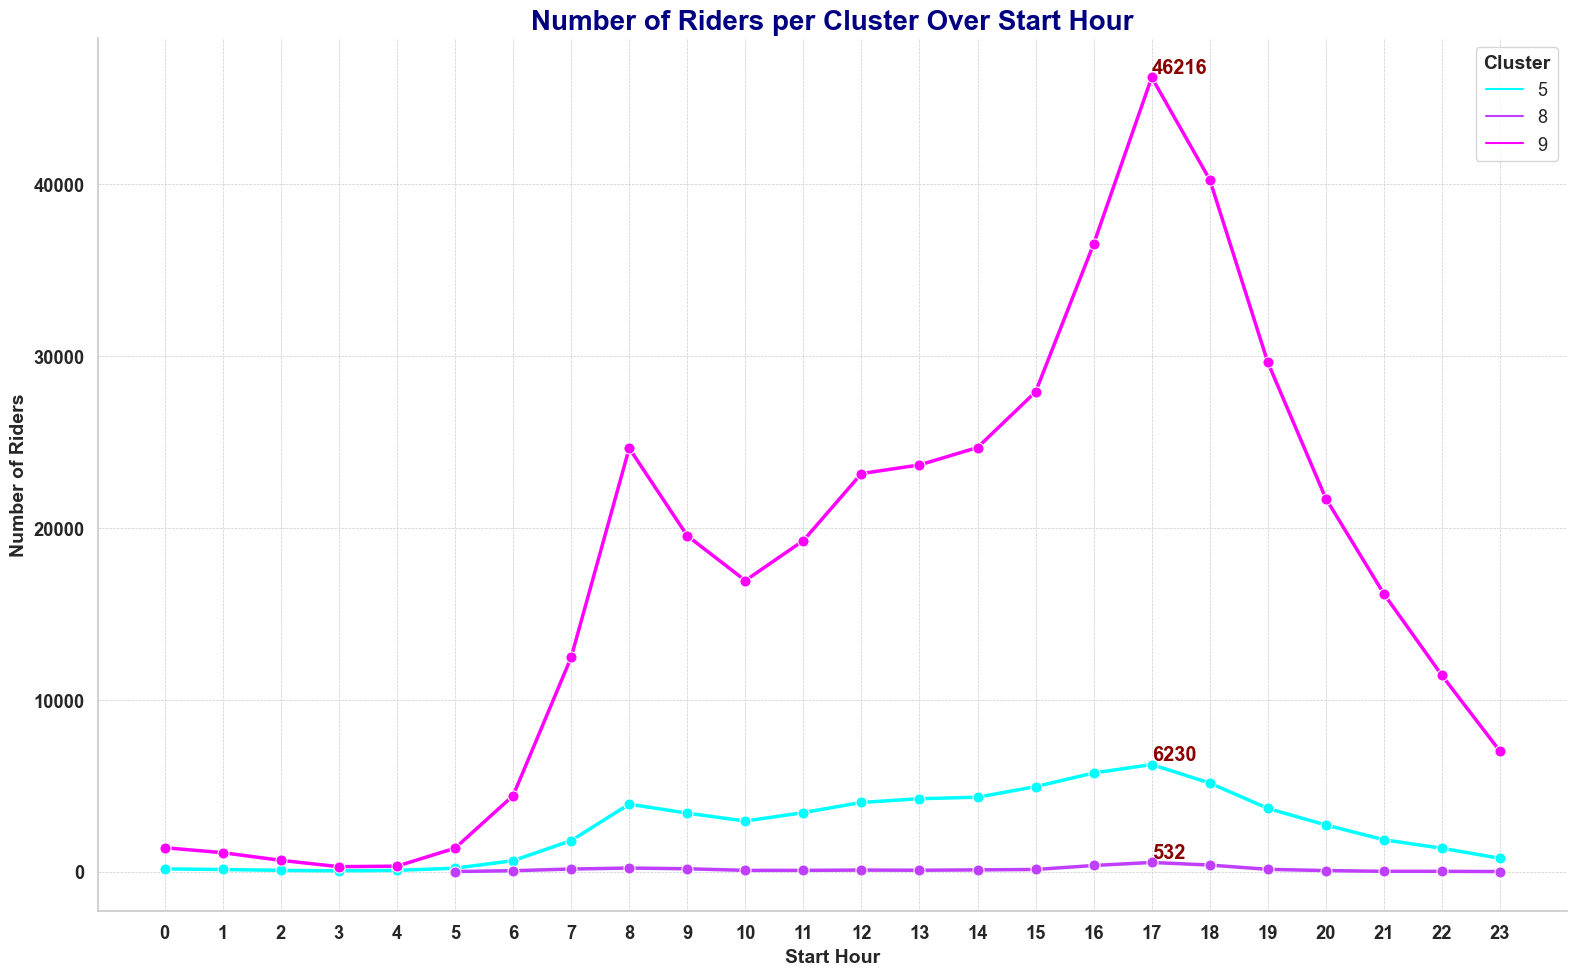

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming rides_per_cluster_hour is already defined
# Custom aesthetic settings for seaborn
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the line plot with enhanced aesthetics
plt.figure(figsize=(16, 10))
lineplot = sns.lineplot(data=rides_per_cluster_hour, x='start_hour', y='num_riders', hue='clusters', 
                        palette='cool', marker='o', linewidth=2.5, markersize=8, 
                        style='clusters', dashes=False)

# Enhance the legend
leg = lineplot.legend(title='Cluster')
plt.setp(leg.get_texts(), fontsize='13')  # for legend text
plt.setp(leg.get_title(), fontsize='14', fontweight='bold')  # for legend title

# Customizing the plot with titles and labels
plt.title('Number of Riders per Cluster Over Start Hour', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Start Hour', fontsize=14, fontweight='bold')
plt.ylabel('Number of Riders', fontsize=14, fontweight='bold')
plt.xticks(range(0, 24), fontweight='bold')  # Assuming start_hour is in 24-hour format
plt.yticks(fontweight='bold')

# Custom grid lines and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(left=False, bottom=False)

# Highlighting peak hours
peak_hours = rides_per_cluster_hour.groupby('clusters')['num_riders'].transform(max) == rides_per_cluster_hour['num_riders']
for line, peak_hour in zip(lineplot.get_lines(), peak_hours):
    if peak_hour:
        plt.setp(line, linewidth=4)  # Highlight the line of the cluster with the most riders

# Optionally, annotate peak points
if peak_hours.any():
    peak_data = rides_per_cluster_hour[peak_hours]
    for _, row in peak_data.iterrows():
        plt.text(row['start_hour'], row['num_riders'], f"{int(row['num_riders'])}", 
                 color='darkred', fontweight='bold', ha='left', va='bottom')

plt.tight_layout()
plt.show()

In [69]:
for run in runs:

    # First, calculate the total number of rides per cluster
    cluster_totals = run.groupby('clusters')['season'].count()

    # Next, pivot the table to count the number of trips per season for each cluster
    trip_count_pivot_table = run.pivot_table(index='clusters', 
                                             columns='season', 
                                             aggfunc='size')

    # Fill null values with zero
    #trip_count_pivot_table = trip_count_pivot_table.fillna(0)
    
    # Calculate the fraction of the total number of rides per cluster taken each season
    fraction_pivot_table = trip_count_pivot_table.div(cluster_totals, axis=0)

    # Create the heatmap
    plt.figure(figsize=(12, 9))
    sns.heatmap(fraction_pivot_table, cmap="viridis", annot=True, fmt=".2f")
    plt.title('Percentage of Trips Per Season')
    plt.xlabel('Season')
    plt.ylabel('Cluster')
    plt.show()

KeyError: 'Column not found: season'

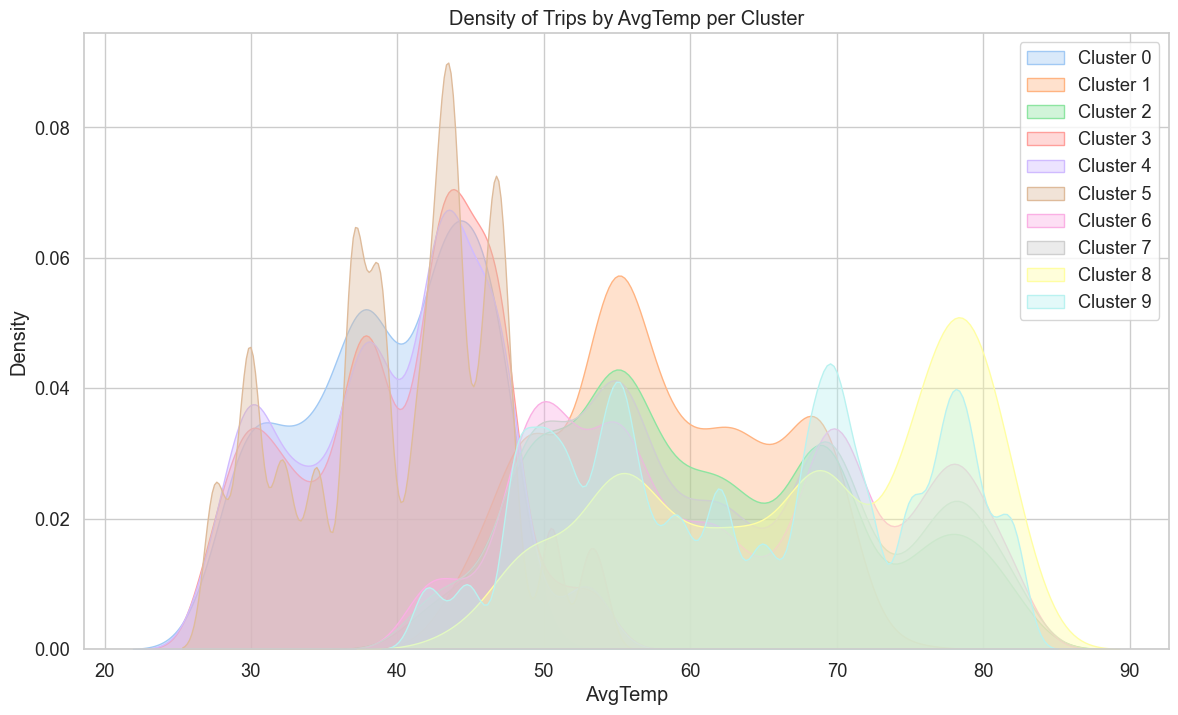

In [30]:
# Assuming 'run1' is your DataFrame
clusters = runs[0]['clusters'].unique()

plt.figure(figsize=(14, 8))

# Plotting a KDE for each cluster
for cluster in sorted(clusters):
    # Selecting the subset of the DataFrame for the current cluster
    cluster_data = runs[0][runs[0]['clusters'] == cluster]
    # Plotting the KDE of AvgTemp for the current cluster
    sns.kdeplot(cluster_data['AvgTemp'], label=f'Cluster {cluster}', fill=True, common_norm=False, alpha=0.4)

plt.title('Density of Trips by AvgTemp per Cluster')
plt.xlabel('AvgTemp')
plt.ylabel('Density')
plt.legend()
plt.show()

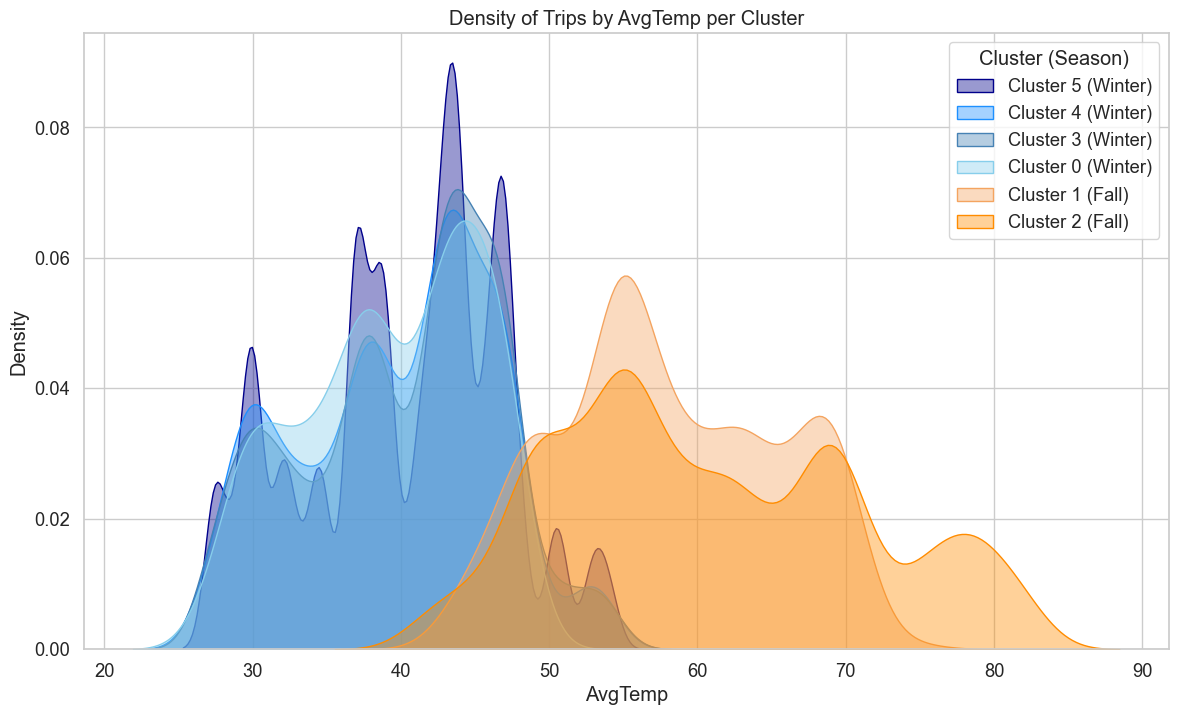

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for clusters 1, 3, and 6
filtered_clusters = runs[0][runs[0]['clusters'].isin([5, 4, 3, 0, 1, 2])]

plt.figure(figsize=(14, 8))

# Update the color map for the clusters
color_map = {5:'darkblue', 4:'dodgerblue' , 3: 'steelblue', 0: 'skyblue', 1: 'sandybrown', 2: 'darkorange'}

# Define cold and warm weather clusters for labeling
cold_weather_clusters = [5, 4, 3, 0]
warm_weather_clusters = [1, 2]

# Plotting a KDE for each of the specified clusters
for cluster in [5, 4, 3, 0, 1, 2]:
    # Selecting the subset of the DataFrame for the current cluster
    cluster_data = filtered_clusters[filtered_clusters['clusters'] == cluster]
    
    # Determine the weather type label based on the cluster
    weather_type_label = "Winter" if cluster in cold_weather_clusters else "Fall"
    
    # Plotting the KDE of AvgTemp for the current cluster
    sns.kdeplot(cluster_data['AvgTemp'], label=f'Cluster {cluster} ({weather_type_label})', fill=True, color=color_map[cluster], common_norm=False, alpha=0.4)

plt.title('Density of Trips by AvgTemp per Cluster')
plt.xlabel('AvgTemp')
plt.ylabel('Density')
plt.legend(title='Cluster (Season)')
plt.show()
